# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [384]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [385]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [386]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [387]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading the dataset

In [388]:
dataset = pd.read_csv("drive/MyDrive/Colab Notebooks/stock_data.csv")

#### Creating a copy of original data

In [389]:
data = dataset.copy()

#### Displaying few rows of the dataset

In [390]:
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

#### Checking the shape of the dataset

In [391]:
data.shape

(340, 15)

#### Checking the data types of the columns for the dataset

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [393]:
# convert all columns with dtype object into category
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

In [394]:
# dropping the ticker symbol column, as it does not provide any information
data.drop('Ticker Symbol', axis=1, inplace=True)

In [395]:
# check data info now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

#### Checking for duplicates and missing values

In [396]:
data.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [397]:
data.duplicated().sum()

0

#### Statistical summary of the dataset

In [398]:
# statistical summary of numerical columns
data.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

In [399]:
# statistical summary of categorical columns
data.describe(include = 'category').T

count unique                                 top freq
Security            340    340                          3M Company    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

Observations:

1. There are 11 unique GICS Sectors and 104 unique GICS Sub Industries, suggesting a wide representation of the market.
Significant range and variability in Current Price, Price Change, and Volatility.
2. ROE and Cash Ratio have a wide range of values.
3. Net Cash Flow, Net Income, P/E Ratio, and P/B Ratio have values significantly highers than 75% suggesting outliers.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

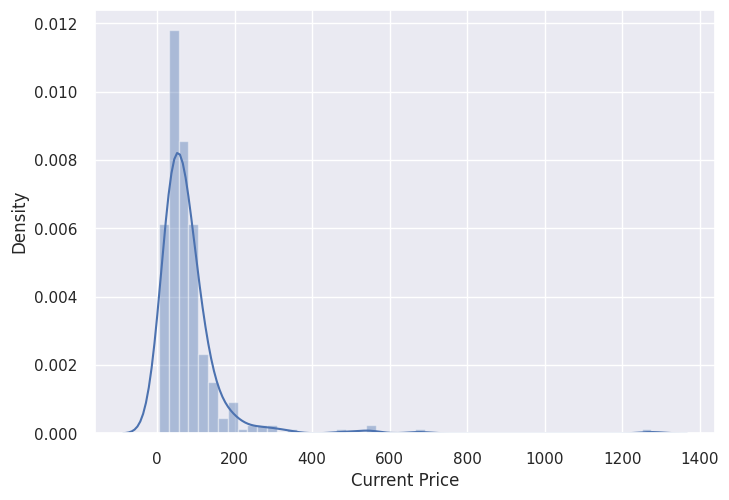

In [400]:
#What does the distribution of stock prices look like?
sns.distplot(data['Current Price'])
plt.show()

Observations: The distribution of stock prices is heavily right-skewed, with most of the prices concentrated at lower values and a long tail extending towards higher prices. In other words, a large number of stocks are priced relatively low (commonly under $100).

In [401]:
#The stocks of which economic sector have seen the maximum price increase on average?
data.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

In [402]:
# Calculate average price change
average_price_change = data.groupby('GICS Sector')['Price Change'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_change, y='GICS Sector', x='Price Change')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.title('Average Price Change by GICS Sector')
plt.show()

Observations: The Health Care sector followed by Consumer Staples have seen the maximum average price increase, with an average price change of about 9.5857% and 8.684750 respectively.

In [403]:
#How are the different variables correlated with each other?
num_cols = data.select_dtypes(include=np.number).columns
sns.pairplot(data[num_cols])
plt.show()

Observations:

Based on the pair plot provided, the relationships between the variables appear to be generally weak and not strongly linear. Most pairs of variables form dispersed clusters of points without any clear upward or downward trends.

Profitability Measures: Variables related to a company's financial performance, such as Net Income and Earnings Per Share (EPS), often show some positive relationship with each other

In [404]:
num_cols = data.select_dtypes(include=np.number).columns

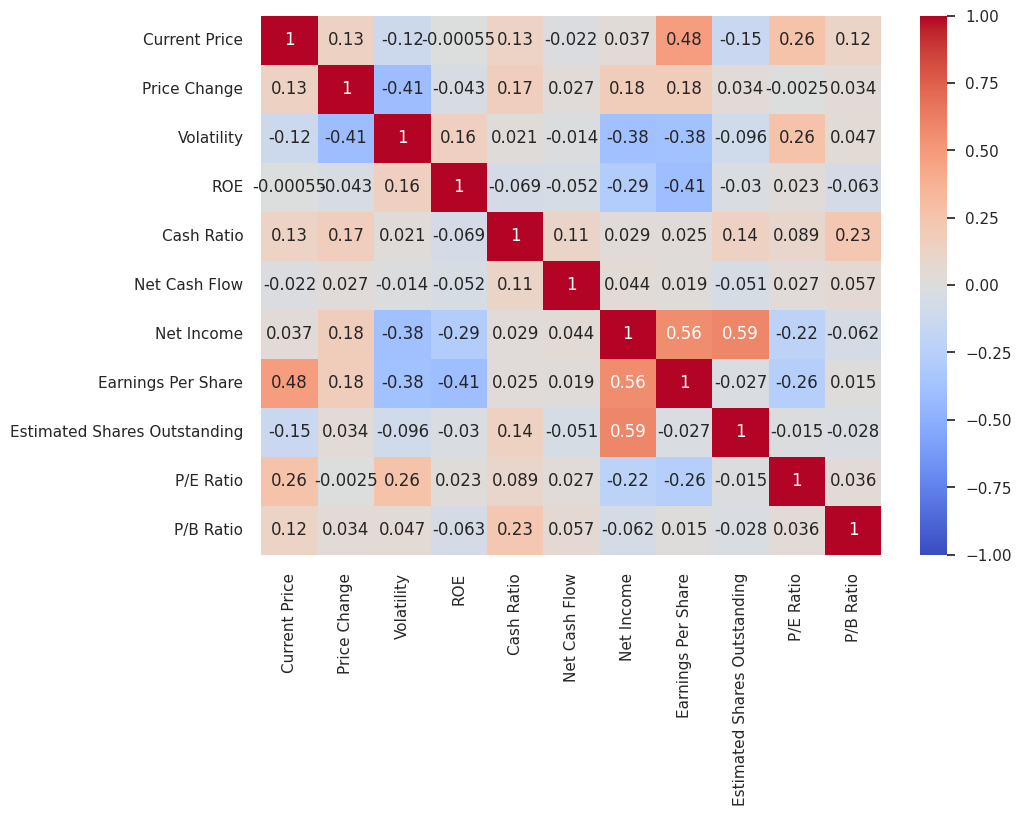

In [405]:
plt.figure(figsize=(10, 7))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Observations:

* Current Price and Earnings Per Share (EPS) have a moderate positive correlation (0.48), indicates that stocks with higher prices may also have higher earnings per share.
* There is a notable positive correlation between Net Income and Earnings Per Share (0.56), between Net Income and Estimated Shares Outstanding (0.59), which means that companies with higher net income tend to have higher earnings per share and may have a greater number of shares outstanding.
* Volatility has a moderate negative correlation with Price Change (-0.41), which may mean that stocks with higher volatility might see less price increase on average. Return on Equity (ROE) shows little to no correlation, indicating its independence as a performance measure.
* The P/E Ratio (Price to Earnings) shows low correlation with other variables, indicates that it is not strongly influenced by the measured financial metrics in this dataset.

In [406]:
#Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
data.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

In [407]:
average_cash_ratio = data.groupby('GICS Sector')['Cash Ratio'].mean().reset_index()
sns.barplot(data=average_cash_ratio, y='GICS Sector', x='Cash Ratio')
plt.title('Average Cash Ratio by GICS Sector')
plt.show()

Observations:

1. Information Technology and Telecommunications Services sectors maintain notably higher average cash ratios of 149.81&117.00, indicating strong liquidity.
2. Health Care and Financials also appear well-prepared for short-term obligations.
3. Meanwhile, sectors like Utilities, Industrials, and Materials hold relatively less cash compared to their immediate liabilities, possibly due to the nature of their operations, stable cash flows, and capital structures that don’t demand holding large cash reserves at all times.

In [408]:
#P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
data.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

Text(0.5, 1.0, 'Average P/E Ratio by GICS Sector')

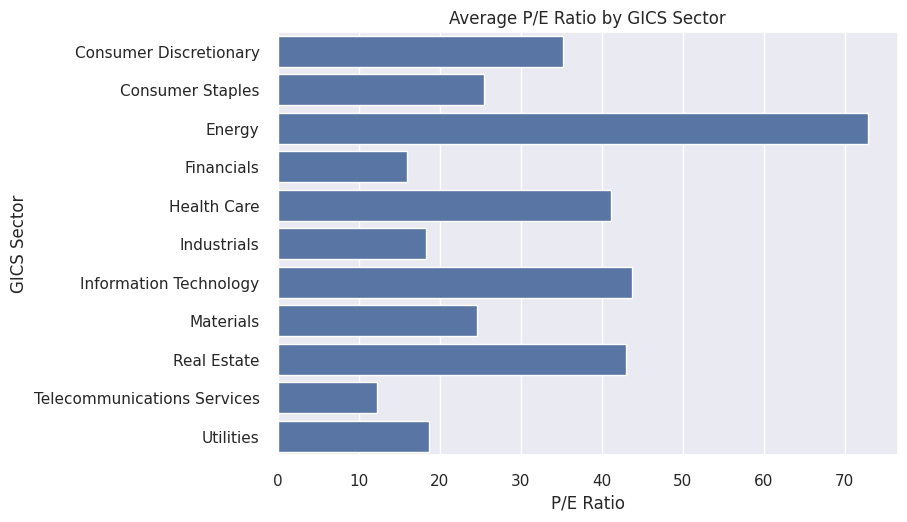

In [409]:
PE_ratio_average = data.groupby('GICS Sector')['P/E Ratio'].mean().reset_index()
sns.barplot(data=PE_ratio_average, y='GICS Sector', x='P/E Ratio')
plt.title('Average P/E Ratio by GICS Sector')

Observations:
sectors perceived to have high growth potential, innovation, or cyclical upside (Energy, Technology, Real Estate, Health Care) are associated with higher average P/E ratios. More mature, stable sectors with predictable but slower earnings growth (Telecom, Financials, Utilities) tend to have lower average P/E ratios.

In [410]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots

    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot with mean shown
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # Histogram

    # Add mean and median to the histogram
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    ax_hist2.axvline(mean_value, color="green", linestyle="--", label=f"Mean: {mean_value:.2f}")
    ax_hist2.axvline(median_value, color="black", linestyle="-", label=f"Median: {median_value:.2f}")

    # Ensure the lines are within the viewable range
    ax_hist2.set_xlim(df[feature].min(), df[feature].max())

    # Add legend to the histogram
    ax_hist2.legend()

    plt.show()

In [411]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Univariate Analysis

Current Price

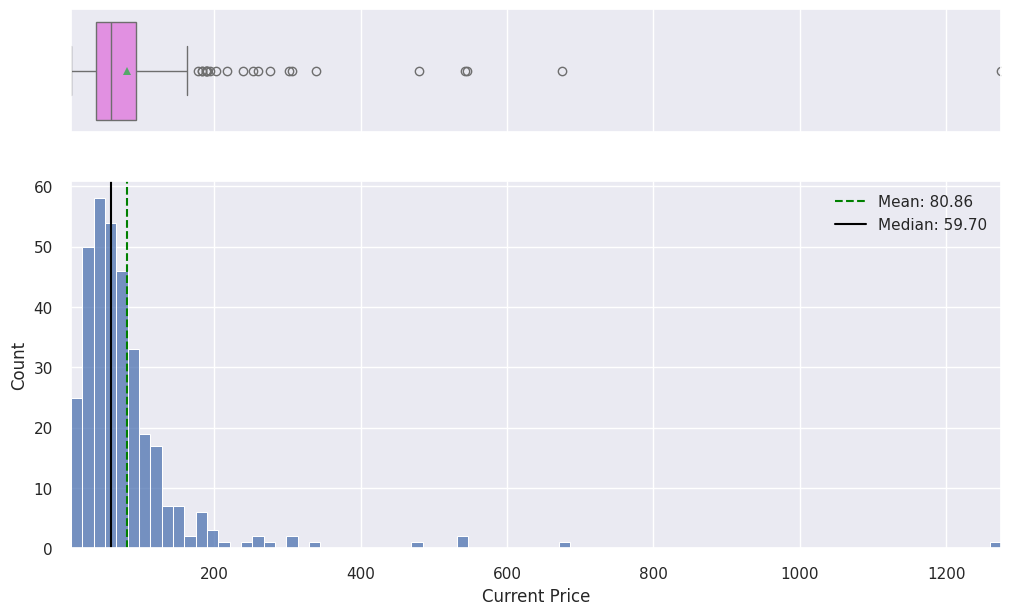

In [412]:
histogram_boxplot(data, 'Current Price')

Observations:
The histogram shows a pronounced concentration of stocks at lower price levels, mostly under 100 $, with the frequency dropping sharply as the price increases. Beyond  100, the counts dwindle, and only a handful of stocks populate these higher price ranges. This creates a long tail extending to the right.

Price Change

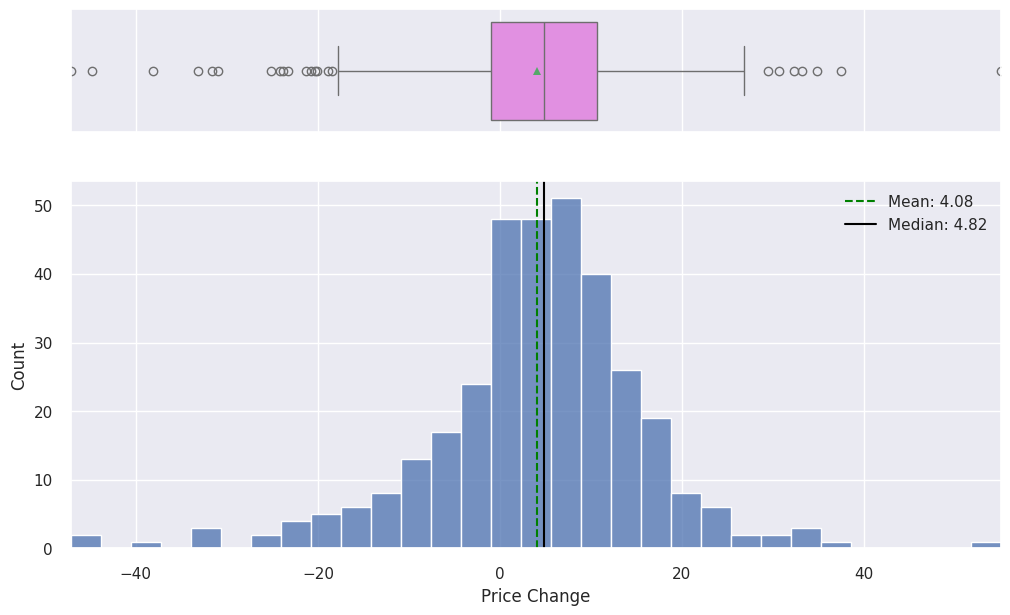

In [413]:
histogram_boxplot(data, 'Price Change')

Obsrvations:
1. Near-Symmetric Distribution Around Zero, indicating lossses and gains over the period.
2. The boxplot indicates that the median price change is close to zero, reinforcing that the central tendency does not heavily favor either gains or losses. The interquartile range (IQR) is relatively modest, showing that most price changes lie within a limited range.
3. Presence of Outliers: At both ends of the distribution, there are outliers — stocks that have experienced unusually large gains on the positive side, and others that have seen significant declines on the negative side.


In Summary: The price changes are generally modest and centered around zero.

Volatility

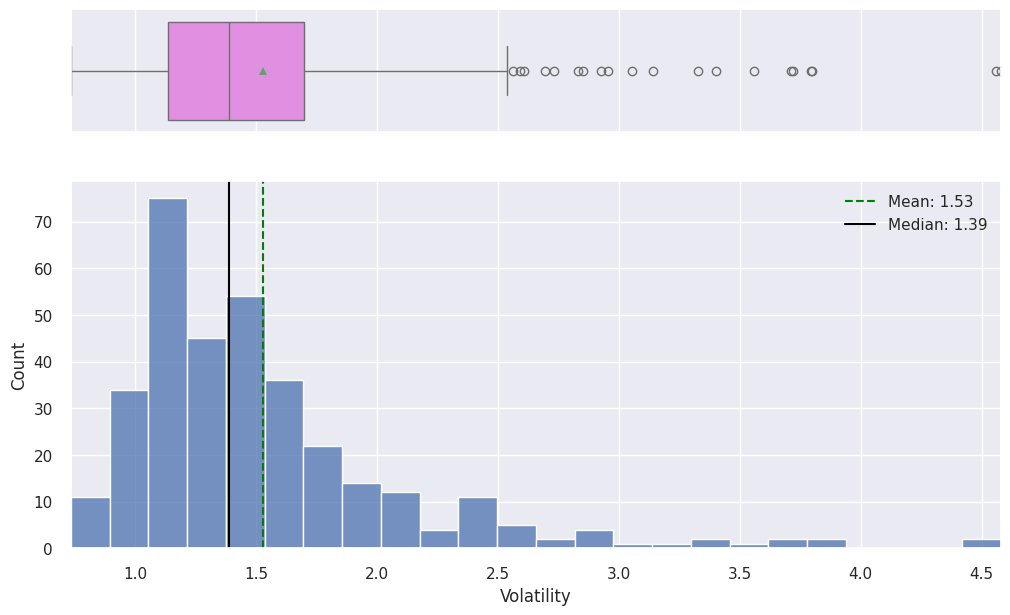

In [414]:
histogram_boxplot(data, 'Volatility')

Observations:
1. Right-Skewed Distribution: The histogram shows that most stocks cluster around a lower volatility range (roughly between 1.0 and 2.0), with the frequency dropping as volatility increases. This creates a tail stretching toward higher volatility levels.

2. Concentration Near the Lower End: A large number of stocks have volatility just above 1.0, suggesting that many experience relatively stable price movements. As volatility increases, fewer stocks fall into those higher ranges.

ROE

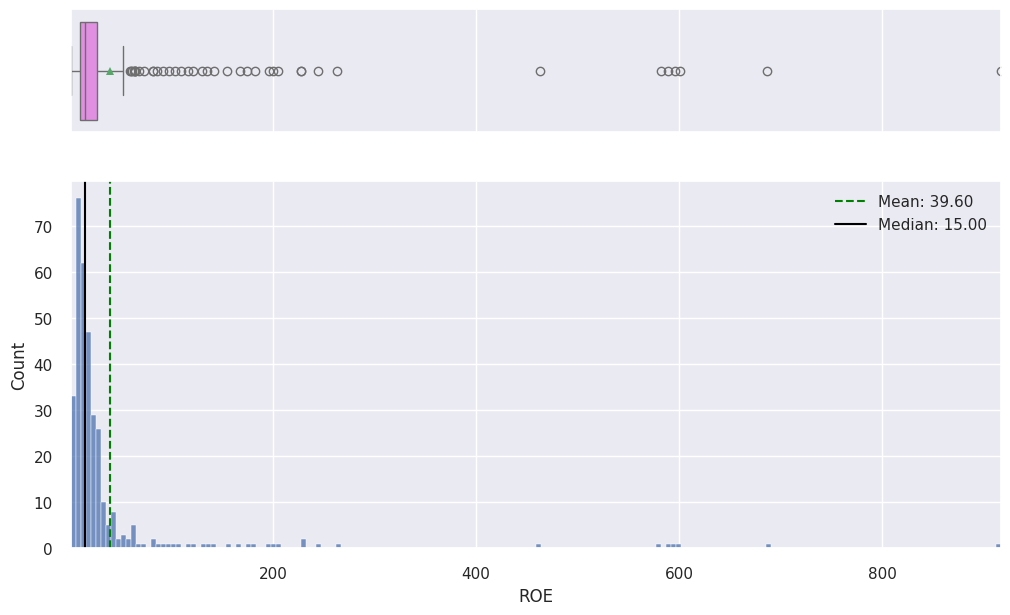

In [415]:
histogram_boxplot(data, 'ROE')

Observations: ROE is predominantly concentrated near the lower end, with many firms not generating significant returns on equity, and a small set of extreme outliers dramatically increasing the upper tail of the distribution. This pattern suggests that while most companies are clustered around mediocre to low ROE levels, a few exceptional cases skew the overall range dramatically.

Cash Ratio

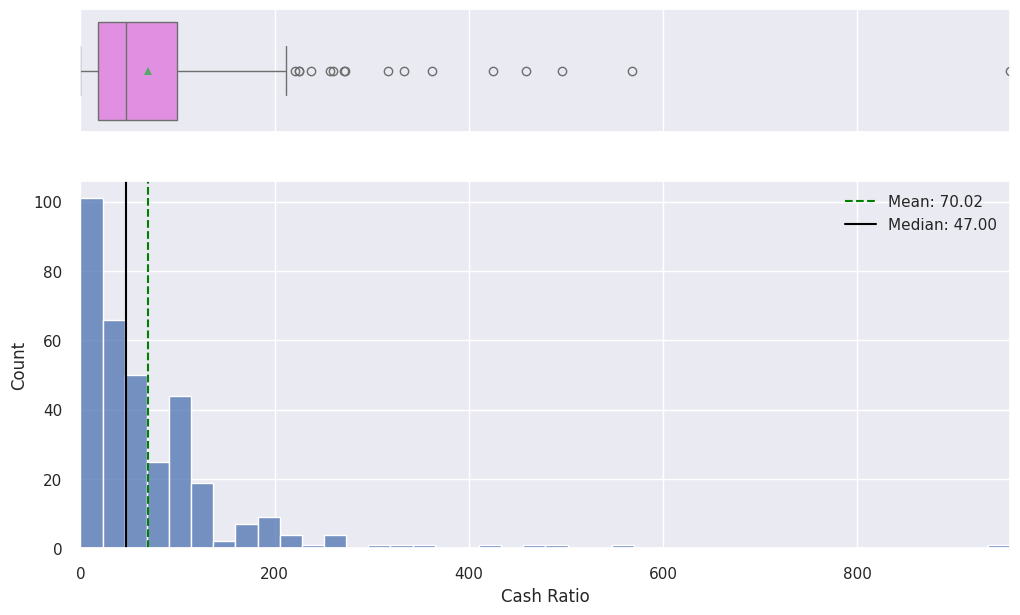

In [416]:
histogram_boxplot(data, 'Cash Ratio')

Observations: Most companies have relatively modest cash positions compared to their short-term obligations, with a minority of companies holding vastly more cash than needed. The distribution is heavily skewed to the right, indicating that while a typical firm may not be especially cash-rich, a few firms maintain extraordinarily high levels of liquidity.

Net Cash Flow

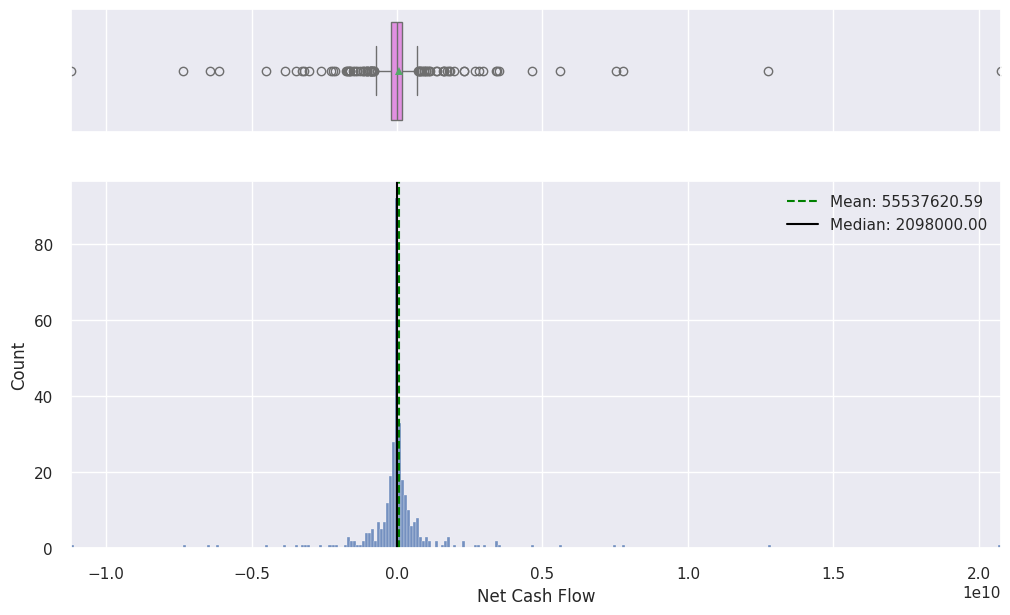

In [417]:
histogram_boxplot(data, 'Net Cash Flow')

Observations: Net Cash Flow distribution is highly concentrated at or near zero, indicating that many companies neither generate large positive cash flows nor incur large negative ones. However, a minority of companies stand out as major outliers, possessing substantially higher or lower net cash flow values that greatly expand the overall range of the distribution.

Net Income

In [418]:
histogram_boxplot(data, 'Net Income')

Observations: Right skewness in net income suggests most companies earn a modest income, with some outliers indicating substantial profits or losses.

Earnings Per Share

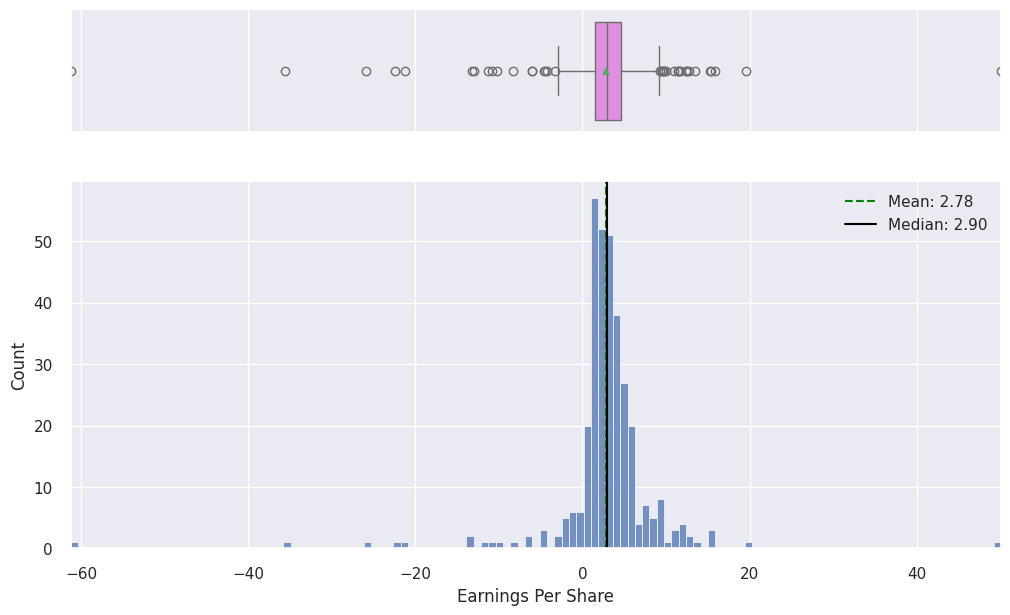

In [419]:
histogram_boxplot(data, 'Earnings Per Share')

Observations: A distribution similar to net income, as it is derived from it, indicates a majority of stocks with modest earnings per share and some with particularly high or low values.

Estimated Shares Outstanding

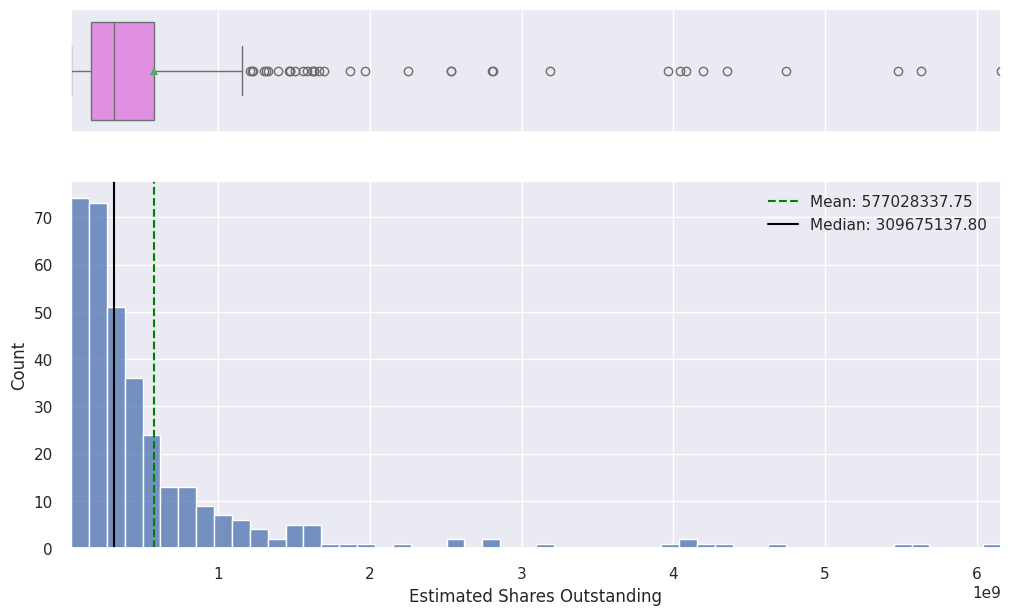

In [420]:
histogram_boxplot(data, 'Estimated Shares Outstanding')

Observations: Estimated Shares Outstanding distribution is dominated by smaller share counts, with a few very large-cap companies creating a long right tail and driving the average upward. This pattern reveals a market landscape where the majority of firms are modest in size, contrasted sharply by the presence of a handful of very large corporations.

P/E Ratio

In [421]:
histogram_boxplot(data, 'P/E Ratio')

Observations: P/E Ratios are predominantly low to moderate, with a median suggesting fairly modest valuations. However, a small subset of companies command extremely high P/E ratios, resulting in a heavily right-skewed distribution and indicating that while most firms trade at reasonable earnings multiples, a few stand out with exceptionally high valuations.

P/B Ratio

In [422]:
histogram_boxplot(data, 'P/B Ratio')

Observations: The P/B Ratio distribution is highly concentrated around zero, with a surprising prevalence of negative values and extreme outliers on both sides. This indicates a group of firms with balance sheets that are either slightly positive, slightly negative, or near zero equity, combined with a few companies whose book values and market prices diverge significantly. Such a pattern suggests a diverse set of financial health profiles, including companies in potentially distressed or highly speculative conditions.

Labeled Bar Plots

GICS Sector

In [423]:
labeled_barplot(data, 'GICS Sector', perc=True)

Observations:
1. Dataset is dominated by Industrials and Financials, with a robust showing from Health Care and Consumer Discretionary.
2. IT, Energy, Real Estate, and Utilities form a moderate middle, while Materials, Consumer Staples, and especially Telecommunications Services hold smaller niches. This distribution can influence analyses, as sectors with fewer companies might be underrepresented in certain trends, while the largest sectors could drive broader patterns in the data.

GICS Sub Industry

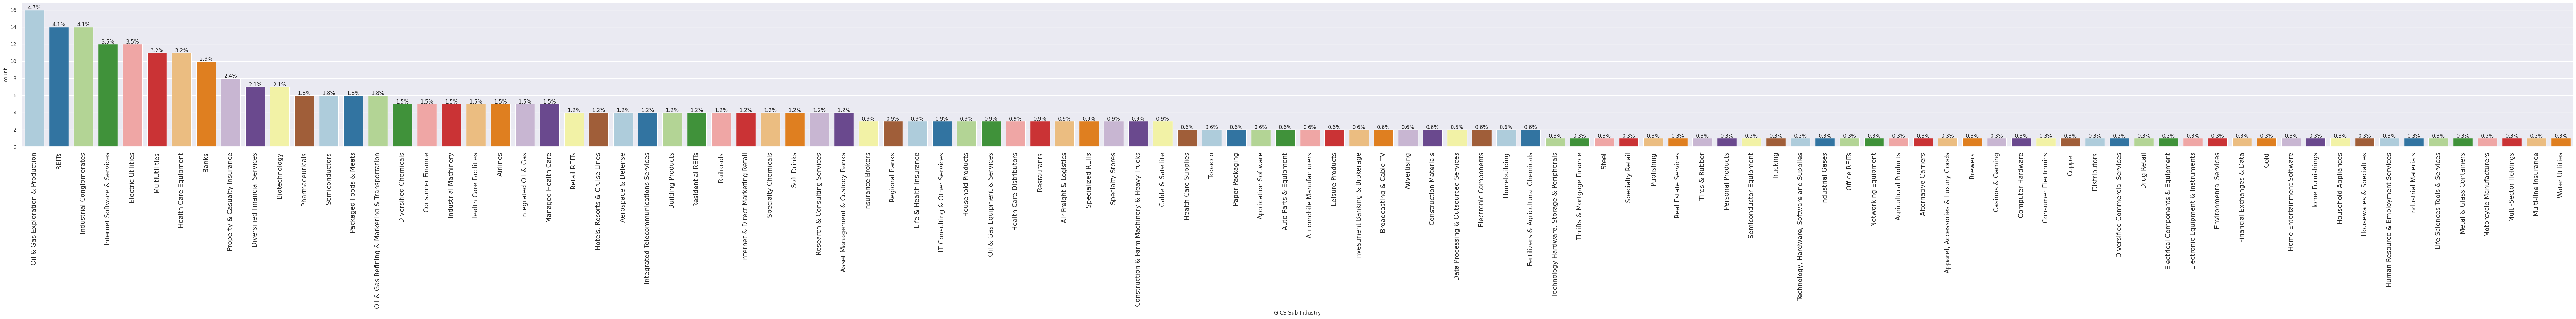

In [424]:
labeled_barplot(data, 'GICS Sub Industry', perc=True)

Observations:  GICS Sub Industries distribution is characterized by a few relatively more common sub industries and a large number of niche categories. This diversity highlights the complexity and breadth of the market segments included in the dataset. It also suggests that any analysis or clustering will have to consider a wide variety of economic segments, each with its unique characteristics and a small representation of companies.

In [425]:
# display the five sub industries with most number of stocks
data['GICS Sub Industry'].value_counts().head()

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
Name: count, dtype: int64

* The dataset is comprised of stocks from 104 different subindustries, with no subindustry having more than 16 stocks in the dataset
* These observations indicate that the 340 stocks held within the dataset are highly diversified across sectors and subindustries

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Duplicate values check, missing value treatment, irrelevant feature removal of ticker symbols already done**

In [426]:
data.head()

Security             GICS Sector      GICS Sub Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

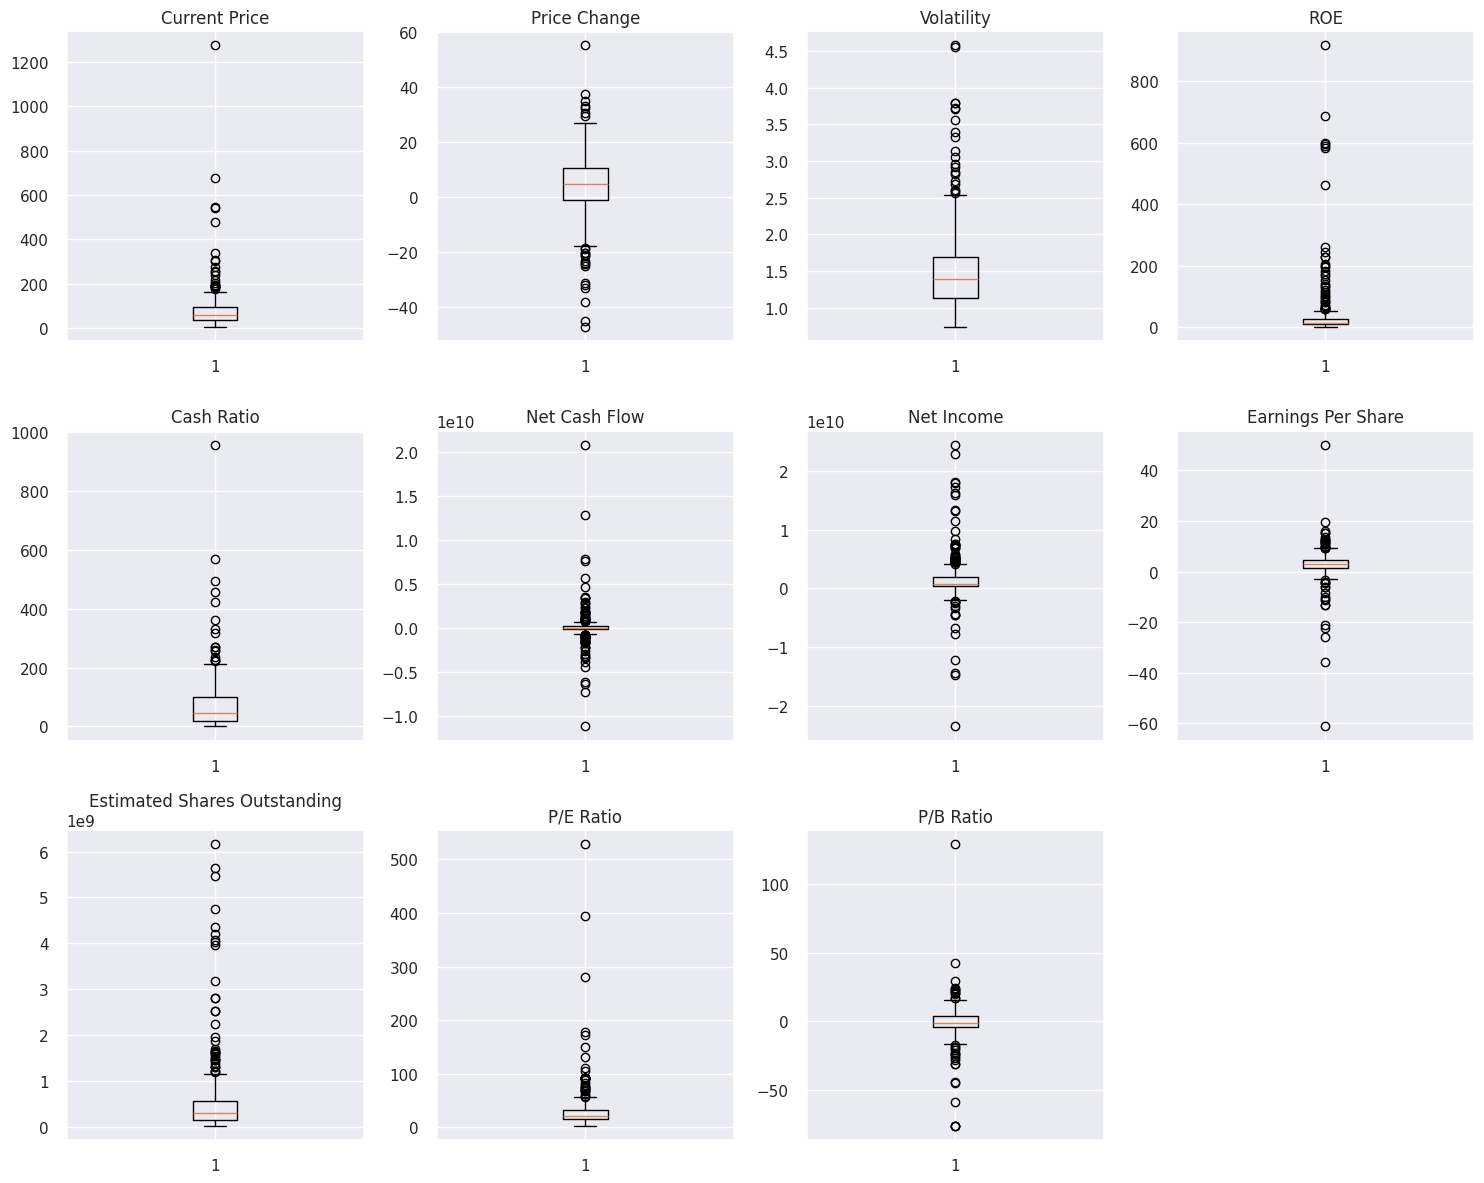

In [427]:
# lets do outlier check
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation: there are all over outliers, will see after scaling whether to remove or keep them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

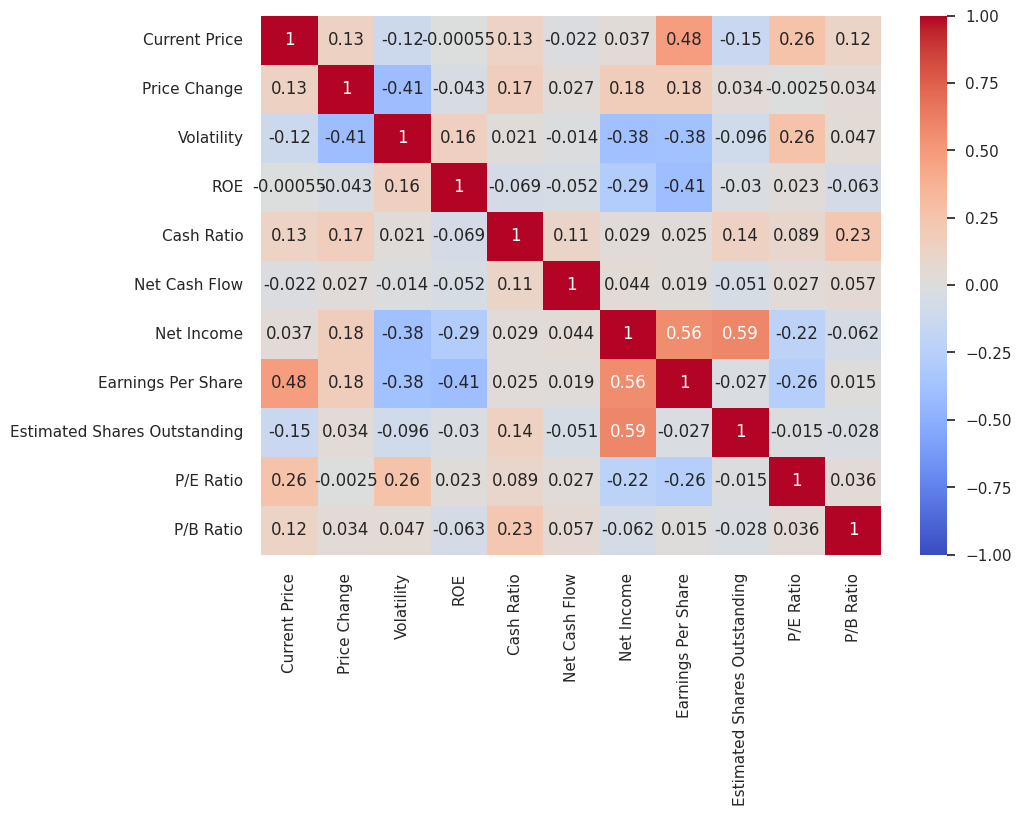

In [428]:
# heatmap
num_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,7))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Observations:

Generally Weak to Moderate Correlations:
Most of the correlation coefficients are centered around zero, indicating weak linear relationships. This suggests that many of the features measure different aspects of the companies and do not strongly move together.

Positive Relationships:

Current Price and EPS: The highest correlation visible is between Current Price and Earnings Per Share (EPS), with a coefficient around 0.48. This makes intuitive sense, as a company generating higher earnings per share often commands a higher stock price.

EPS, Net Income, and Estimated Shares Outstanding: Net Income shows moderate positive correlations with EPS (around 0.56) and Estimated Shares Outstanding (~0.59). Larger, more profitable firms often have more shares outstanding and higher EPS. Similarly, EPS is derived directly from Net Income and Shares Outstanding, naturally tying these variables together.

Volatility and Price Change: Volatility is moderately inversely correlated with Price Change (around -0.41), indicating that stocks that have been more volatile over the period might be less likely to show stable positive returns.
P/E and Volatility: There’s a small positive correlation (~0.26) between P/E Ratio and Volatility, suggesting that stocks with higher valuation multiples can sometimes be more volatile, possibly due to growth expectations or speculation.

Negative Relationships:

Volatility and Profitability Measures (ROE, Net Income, EPS): Notable negative correlations exist between Volatility and these profitability measures. For instance:
Volatility and Net Income (~-0.38)
Volatility and EPS (~-0.38)
Volatility and ROE (~-0.16)

This suggests that more profitable or stable companies (with higher ROE, Net Income, or EPS) tend to exhibit lower price volatility, potentially due to more predictable earnings streams and investor confidence.


**Interpretation in a Clustering Context**:
Given the generally low correlations, none of these variables alone dictate how the others behave. For clustering, this can be advantageous because it implies that each variable may add unique information. However, the lack of strong relationships also suggests that no single factor dominates the data structure, making cluster formation potentially more nuanced.

### Scaling

- Let's scale the data before we proceed with clustering.

In [429]:
#scale the data set before clustering
scaler = StandardScaler()
subset = data[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [430]:
#create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

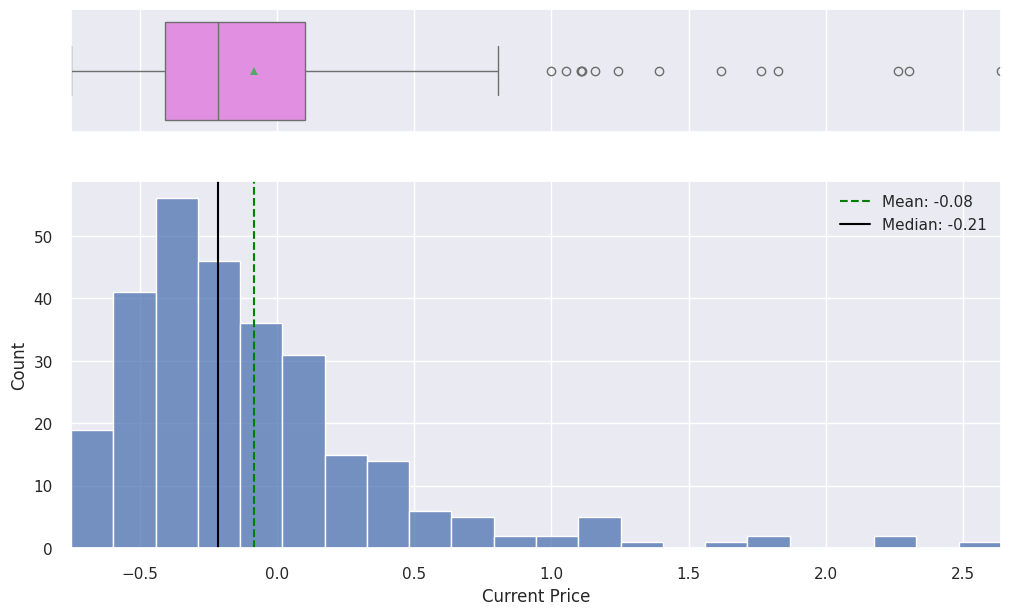

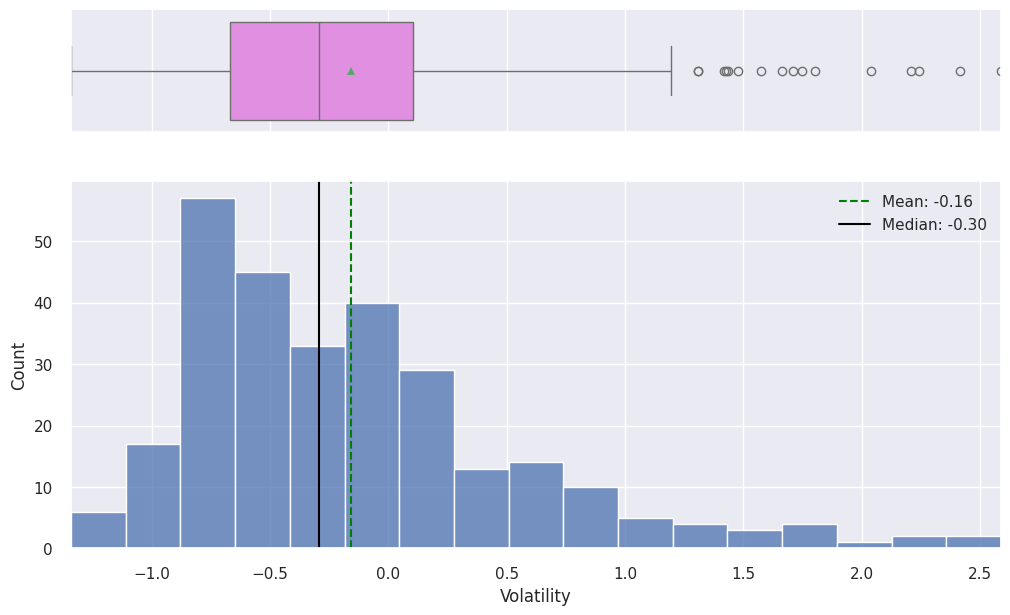

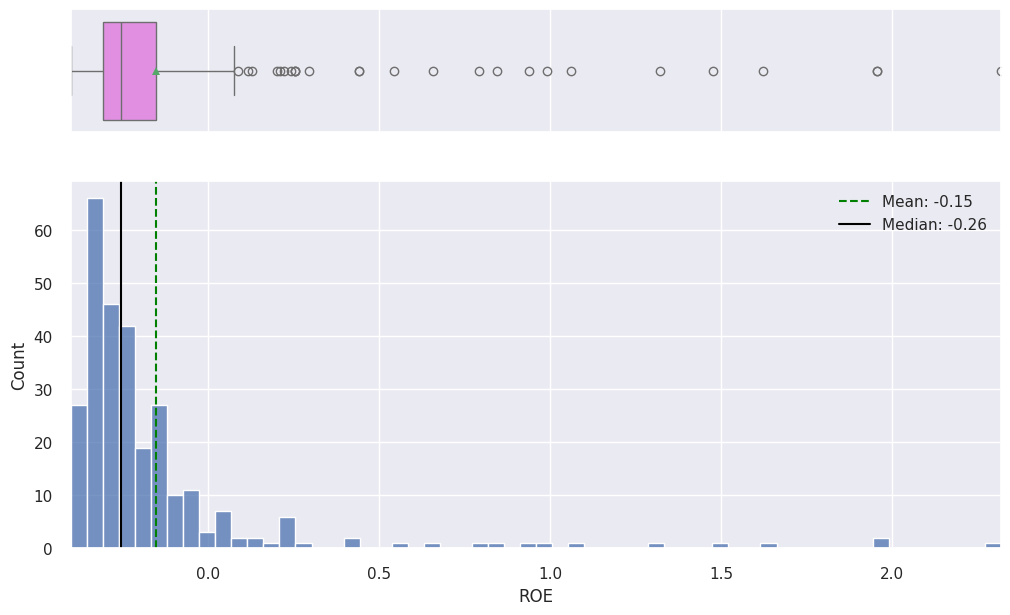

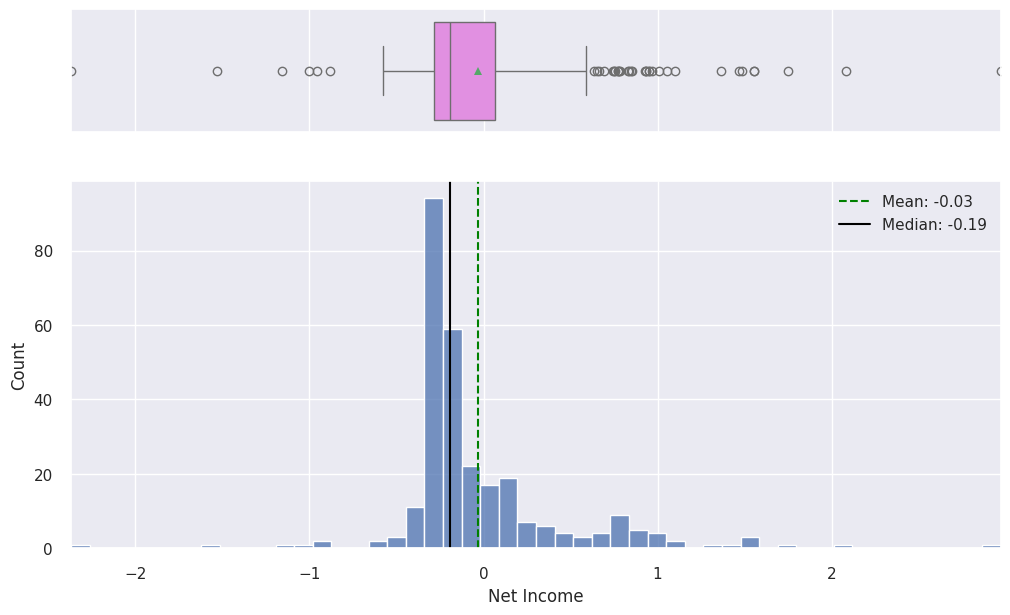

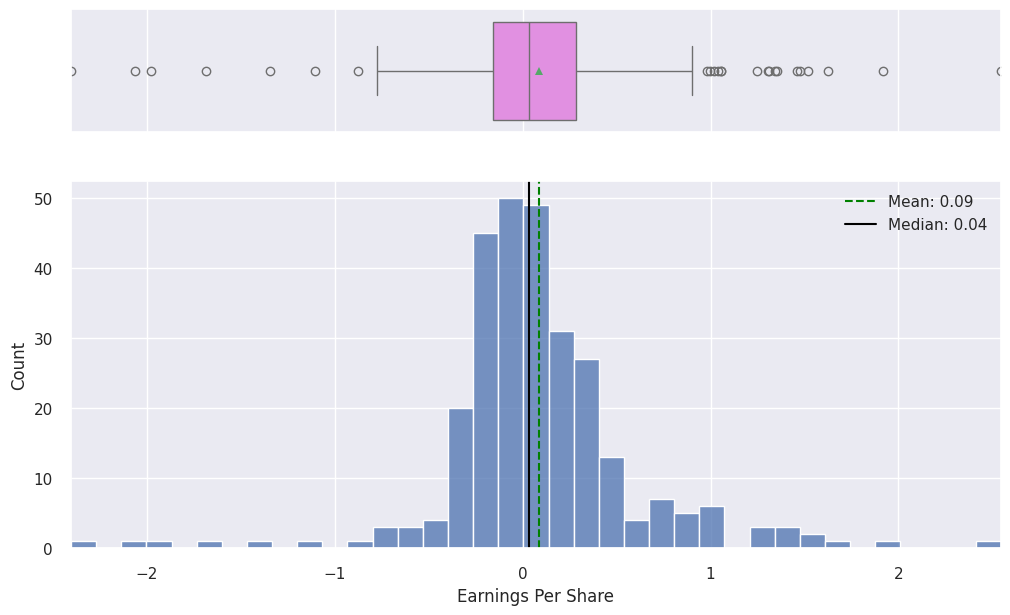

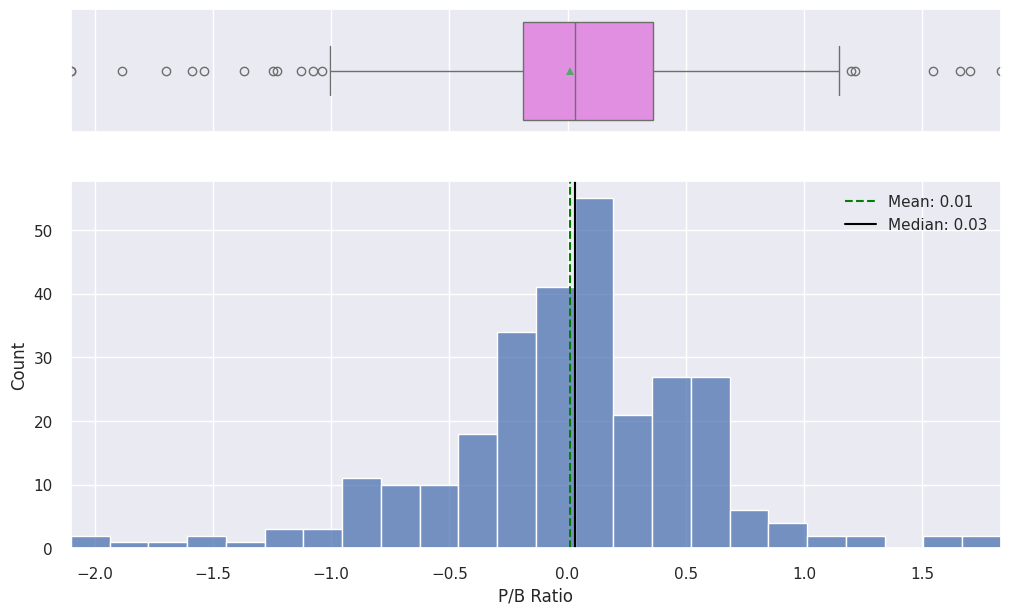

In [431]:
threshold = 3

# Remove rows where any of the scaled values are greater than the absolute value of the threshold
df_no_outliers = subset_scaled_df[(np.abs(subset_scaled_df) < threshold).all(axis=1)]


# Plot all the numerical variables to check weather distribution is preserved
numerical_variables = [
    'Current Price',
    'Price Change',
    'Volatility',
    'ROE',
    'Cash Ratio',
    'Net Cash Flow',
    'Net Income',
    'Earnings Per Share',
    'Estimated Shares Outstanding',
    'P/E Ratio',
    'P/B Ratio'
    ]
# Loop through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
   histogram_boxplot(df_no_outliers, variable)

Observation: After doing outliers removal its not affecting distribution much, so better to keep them to be safe.

#### Distribution of Data for Each Variable
Use KDE plot on the diagonal to visualize the probability density of the variable(s) at different values.

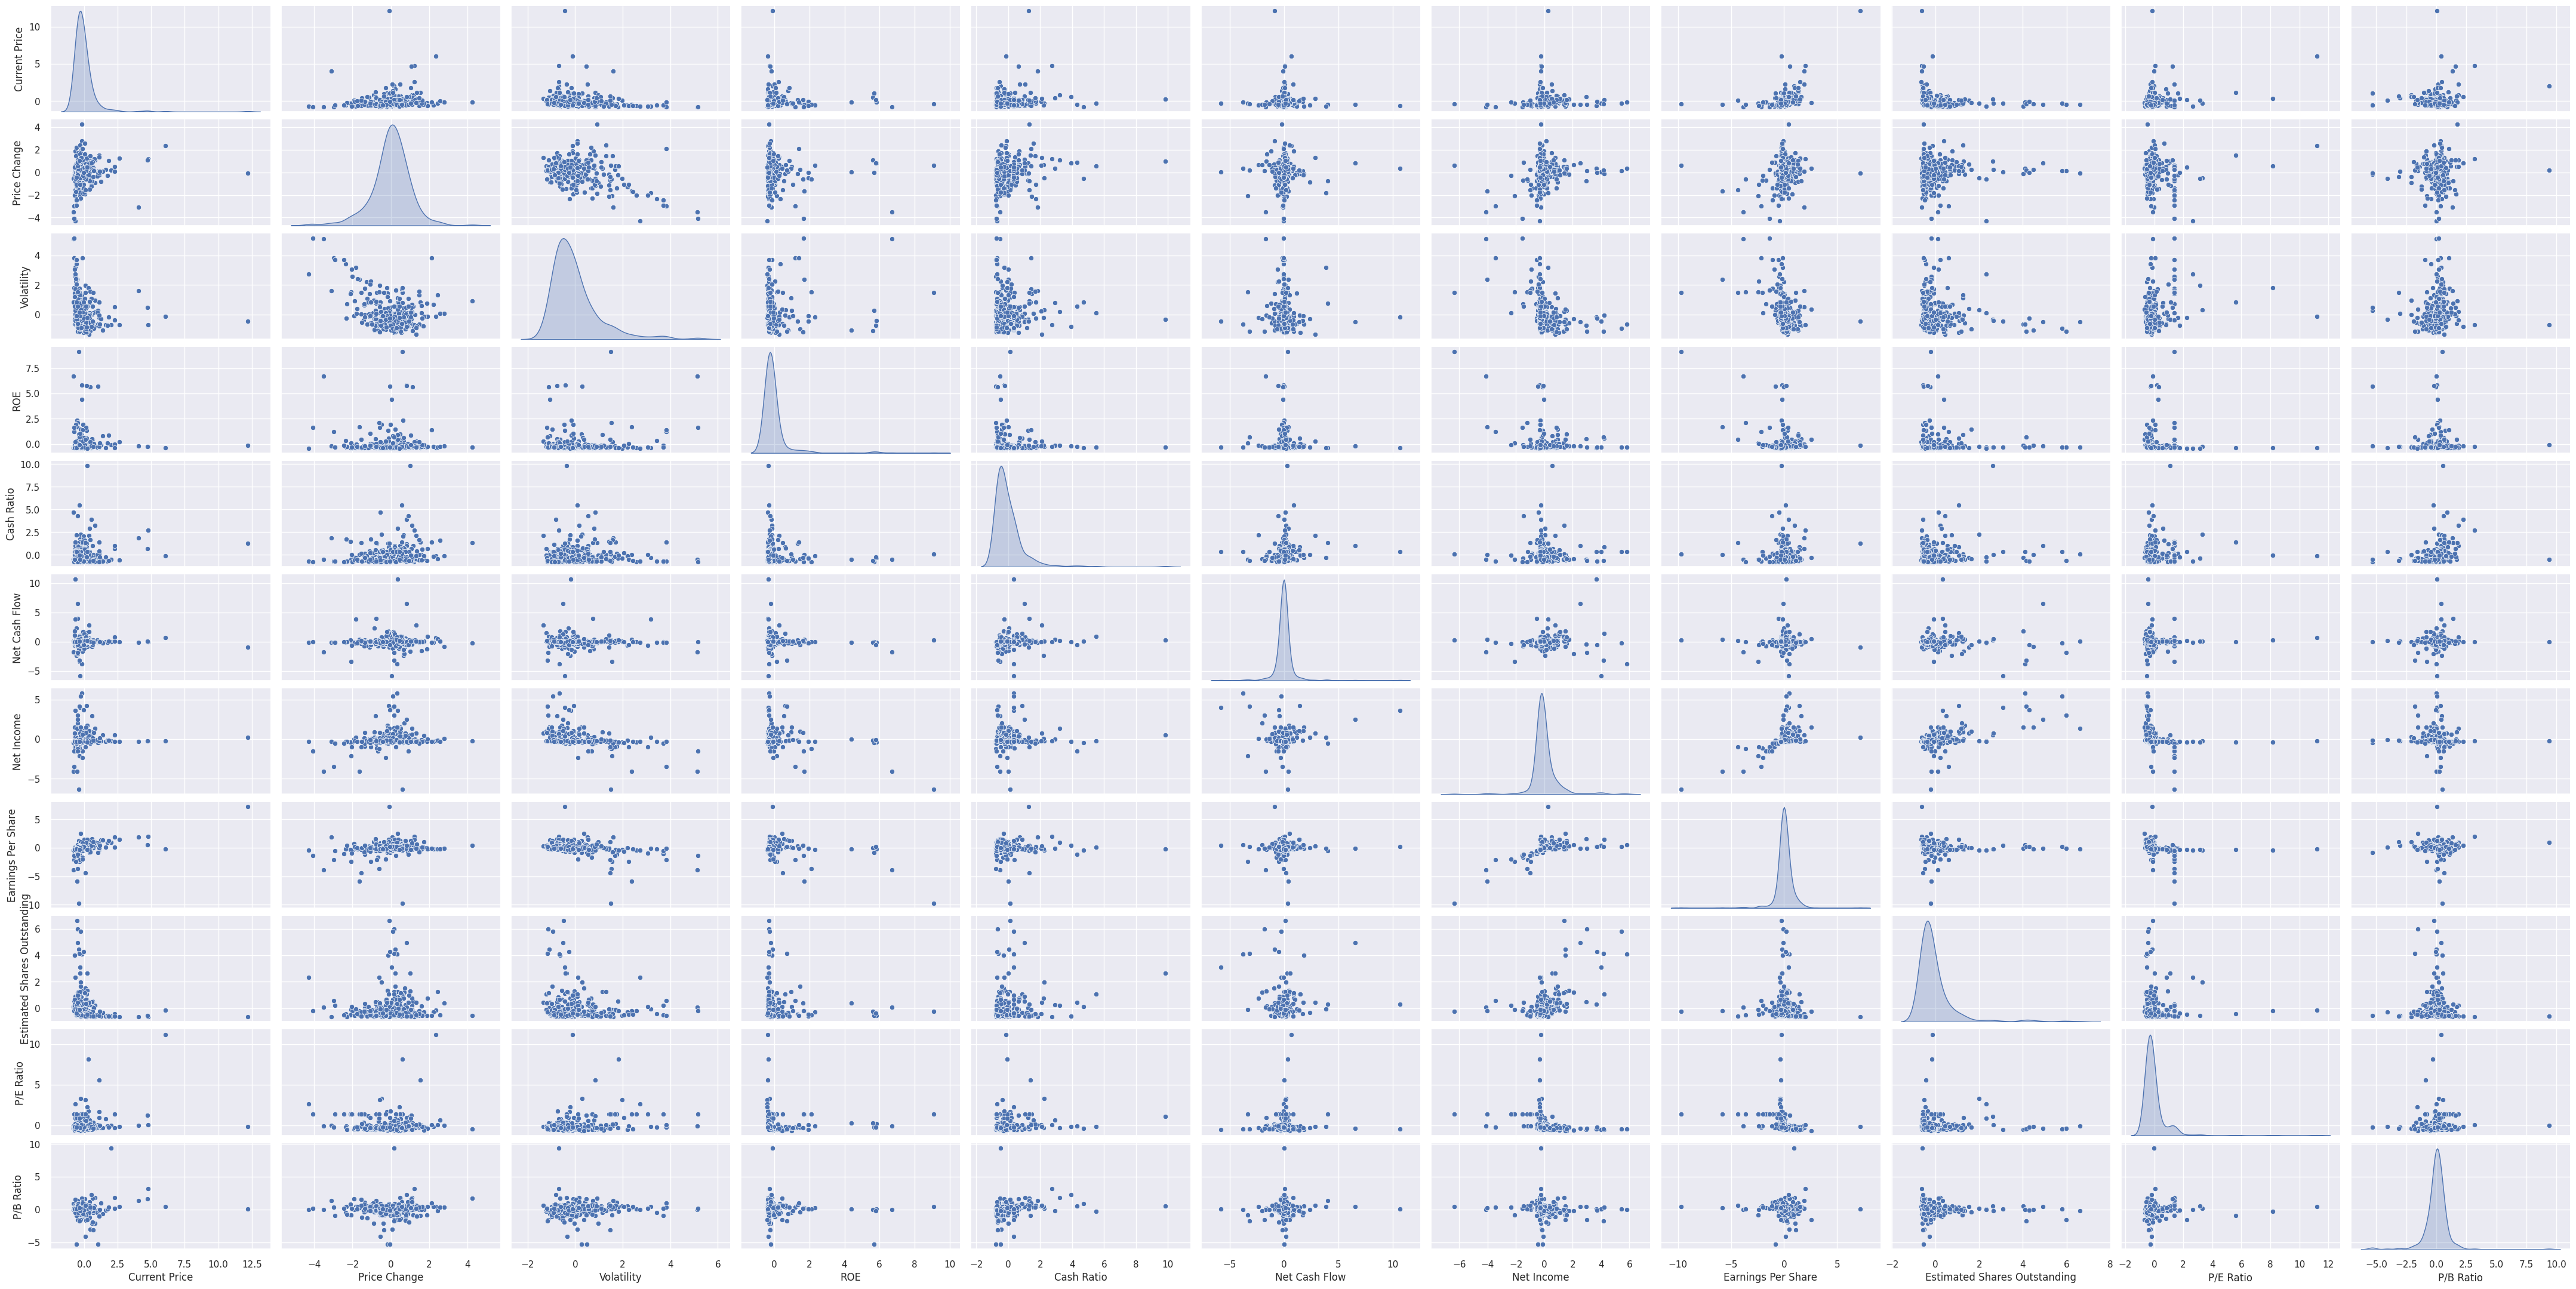

In [432]:
sns.pairplot(subset_scaled_df, height=2, aspect=2, diag_kind='kde')

Observations:

* no clear correlation between variables.
* outliers are there

### Principal Component Analysis (PCA)

Perform PCA on scaled data and visualize the amount of variance that each principal component explains.

In [433]:
covMatrix = np.cov(subset_scaled_df, rowvar=False)
print(covMatrix)

[[ 1.00294985e+00  1.35379678e-01 -1.24623162e-01 -5.51076941e-04
   1.28193172e-01 -2.20255018e-02  3.67332609e-02  4.81018703e-01
  -1.45735035e-01  2.61040375e-01  1.25001740e-01]
 [ 1.35379678e-01  1.00294985e+00 -4.09485757e-01 -4.34381685e-02
   1.69082964e-01  2.68245310e-02  1.79826528e-01  1.75918225e-01
   3.37550438e-02 -2.49801709e-03  3.44304592e-02]
 [-1.24623162e-01 -4.09485757e-01  1.00294985e+00  1.63011319e-01
   2.06659452e-02 -1.42137739e-02 -3.84563951e-01 -3.80427812e-01
  -9.59867699e-02  2.64377469e-01  4.66653027e-02]
 [-5.51076941e-04 -4.34381685e-02  1.63011319e-01  1.00294985e+00
  -6.93260015e-02 -5.23589005e-02 -2.89375193e-01 -4.06486472e-01
  -3.03773642e-02  2.34095558e-02 -6.34048877e-02]
 [ 1.28193172e-01  1.69082964e-01  2.06659452e-02 -6.93260015e-02
   1.00294985e+00  1.14154326e-01  2.86730699e-02  2.48317919e-02
   1.36269927e-01  8.97470272e-02  2.30349368e-01]
 [-2.20255018e-02  2.68245310e-02 -1.42137739e-02 -5.23589005e-02
   1.14154326e-01  

In [434]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
pca.fit(subset_scaled_df)

PCA(n_components=11)

In [435]:
print(pca.explained_variance_)

[2.51212401 1.58411327 1.33434149 1.11310406 1.09308721 0.95662194
 0.82731447 0.71754029 0.4845015  0.2833637  0.12633645]


In [436]:
# Print the eigenVECTORS (principal components), which define the directions of maximum variance in the data
print(pca.components_)

[[ 0.18335823  0.27666842 -0.42919618 -0.30106508  0.08417114  0.03368814
   0.51091003  0.5033668   0.22120756 -0.20815091  0.00991673]
 [ 0.5774047   0.18815749  0.04101083 -0.06258117  0.32773726  0.1280034
  -0.25155831  0.18433241 -0.36327549  0.37736302  0.360796  ]
 [-0.17770732  0.04646452  0.18283759  0.00473711  0.53919175  0.1855024
   0.20918754 -0.27531285  0.58166569  0.24934832  0.2959799 ]
 [-0.00900284  0.65971773 -0.38664453  0.53431652  0.0838151  -0.13655589
  -0.12101272 -0.26011429  0.02333621 -0.00303257 -0.14551133]
 [-0.39287414  0.12202474 -0.14571667 -0.12446023  0.1588855   0.56275703
  -0.17221048 -0.06902206 -0.32807051 -0.47228787  0.29493986]
 [ 0.04539895  0.07374983 -0.01301984 -0.04924358 -0.1433002   0.69439441
   0.07660902 -0.02703535  0.00607268  0.39241333 -0.571456  ]
 [ 0.34597383 -0.32918961  0.06740711  0.69551664 -0.04384053  0.31995867
   0.15598116  0.16995766  0.13220581 -0.30317218  0.12940702]
 [ 0.03785302 -0.10485332  0.17805858  0.00

In [437]:
# Print the proportion of variance explained by each component
print(pca.explained_variance_ratio_)

[0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908 0.04391604 0.02568457 0.01145135]


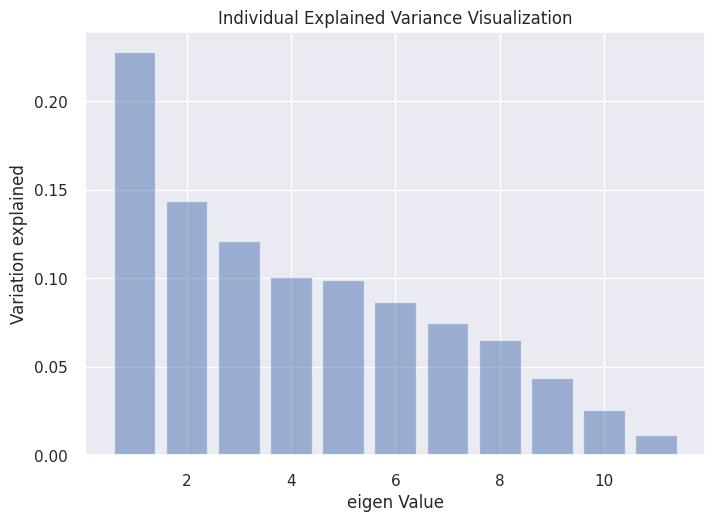

In [438]:
# Create a bar chart showing the proportion of variance explained by each principal component
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.title("Individual Explained Variance Visualization")
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

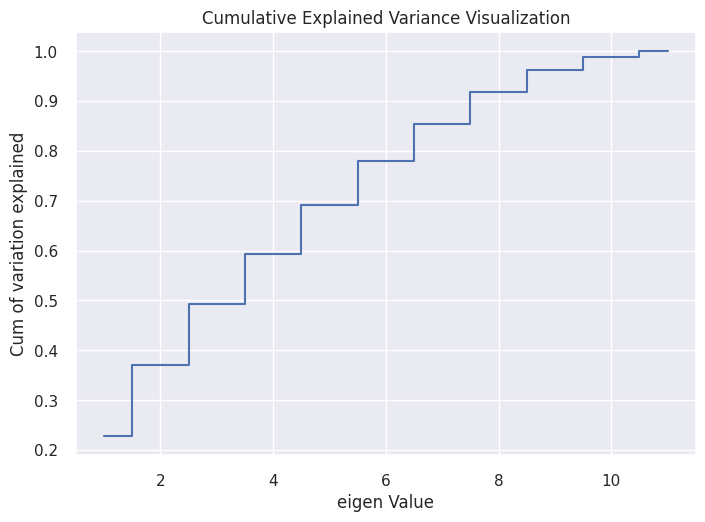

In [439]:
# Create a step plot showing the cumulative proportion of variance explained by the components
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.title("Cumulative Explained Variance Visualization")
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Observations:

This helps to understand how many components are needed to explain most of the data and it seems like all the components are needed. This suggests that each component is adding some information, and we need all to capture most of the variance in the dataset, 6 components explain the 80% variance in data, moreover it needs domain experties to decide.

## K-means Clustering

In [440]:
k_means_df = subset_scaled_df.copy()

In [441]:
k_means_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

#### Checking the Elbow Plot

In [442]:
#print average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(
            np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.4376302917036523
Number of Clusters: 3 	Average Distortion: 2.2999312302566155
Number of Clusters: 4 	Average Distortion: 2.2131059120529395
Number of Clusters: 5 	Average Distortion: 2.126829442356109
Number of Clusters: 6 	Average Distortion: 2.098362711399764
Number of Clusters: 7 	Average Distortion: 2.0208602986560544
Number of Clusters: 8 	Average Distortion: 1.9696714011872667
Number of Clusters: 9 	Average Distortion: 1.9534830979860072
Number of Clusters: 10 	Average Distortion: 1.894011353857326


In [443]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()

The appropriate value of k from the elbow curve seems to be 4

#### Lets check the Silhouette Scores

The silhouette score measures how similar an object is to its own cluster compared to other clusters.

* A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
If most objects have a high value, it indicates that the clustering configuration is appropriate.
* A score close to 0 suggests that the object is on or very close to the decision boundary between two neighboring clusters.
This indicates an overlap between clusters.
* A score below 0 indicates that those objects might have been assigned to the wrong cluster.

For n_clusters = 2, the silhouette score is 0.4484662124740991)
For n_clusters = 3, the silhouette score is 0.4419662311474576)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.4670141851729817)
For n_clusters = 6, the silhouette score is 0.16609442972204497)
For n_clusters = 7, the silhouette score is 0.16010466610937854)
For n_clusters = 8, the silhouette score is 0.3811731688385819)
For n_clusters = 9, the silhouette score is 0.16110839502412727)
For n_clusters = 10, the silhouette score is 0.15641849202440433)


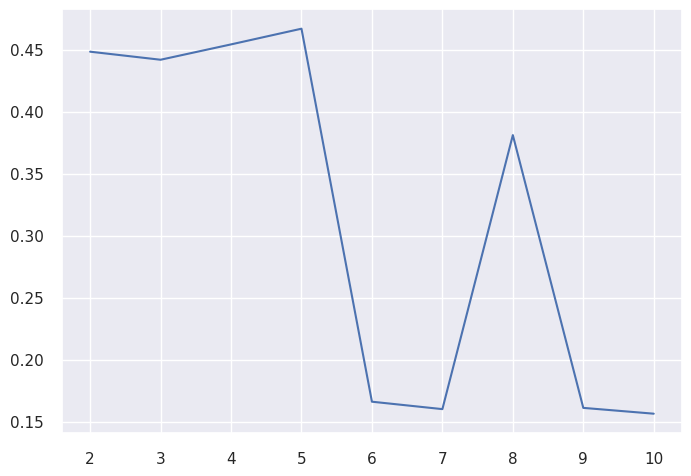

In [444]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

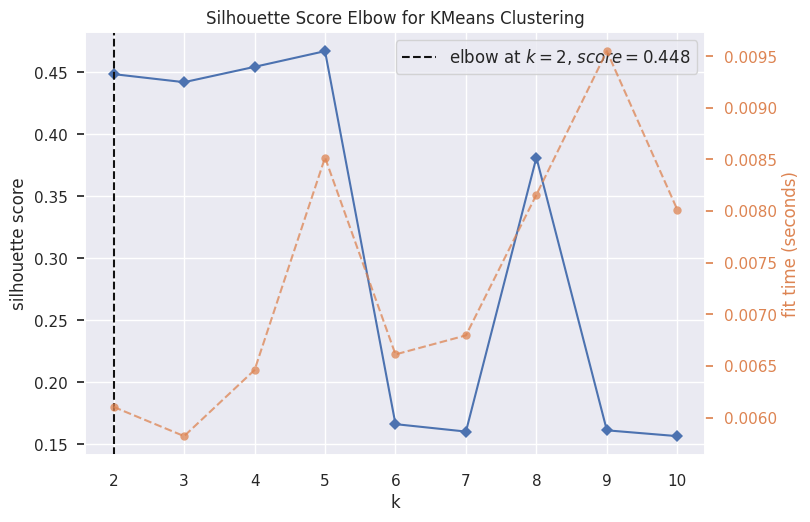

In [445]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()

Observations:

The highest silhouette score is observed for n_clusters = 5 representing the the optimal number of clusters.

In [446]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

* Between the Elbow and Silhouette plots, the number of clusters with the best performance appears to be 5

#### Creating Final Model

In [447]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=42)

In [448]:
# adding kmeans cluster labels to the original and scaled dataframe
data1 = data.copy()
data1["KMeans_clusters"] = kmeans.labels_
k_means_df["KMeans_clusters"] = kmeans.labels_

In [449]:
data1.head()

Security             GICS Sector      GICS Sub Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  KMeans_clusters  
0  -8.784219                2  
1  -8.750068                2  
2  -0.394171                2  
3   4.199651                2  
4   1.059810                4

### Cluster Profiling

In [450]:
num_cols = data1.select_dtypes(include=np.number).columns
km_cluster_profile = data1[num_cols].groupby("KMeans_clusters").mean()

In [451]:
#add counts for number of stocks in each cluster
km_cluster_profile['count_in_each_segment'] = (data1.groupby('KMeans_clusters')['Security'].count().values)

In [452]:
km_cluster_profile.style.highlight_max(color = 'grey',axis=0)

In [453]:
for cl in data1['KMeans_clusters'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data1[data1['KMeans_clusters'] == cl]['Security'].unique())
    print("-" * 100)

In cluster 2, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 282
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
----------------------------------------------------------------------------------------------------
In cluster 4, the following companies are present:
['Analog Devices, Inc.', 'Amgen Inc', 'Bank of America Corp', 'Celgene Corp.', 'Facebook', ..., 'Intel Corp.', 'McDonald's Corp.', 'Monster Beverage', 'Waters Corporation', 'Yahoo Inc.']
Length: 13
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
-----------------------------

In [454]:
#print number of stocks within each sector for all of the clusters
for k in range(0,data1['KMeans_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(data1[data1['KMeans_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
GICS Sector
Energy                         22
Information Technology          3
Consumer Discretionary          1
Industrials                     1
Materials                       1
Consumer Staples                0
Financials                      0
Health Care                     0
Real Estate                     0
Telecommunications Services     0
Utilities                       0
Name: count, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
GICS Sector
Consumer Discretionary         3
Health Care                    3
Information Technology         1
Real Estate                    1
Consumer Staples               0
Energy                         0
Financials                     0
Industrials                    0
Materials                      0
Telecommunications Services    0
Utilities                      0
Name: count, dtype: int64
   
The number of stocks within each GICS Sector for Cl

In [455]:
data1.groupby('KMeans_clusters')['Security'].count()

KMeans_clusters
0     28
1      8
2    282
3      9
4     13
Name: Security, dtype: int64

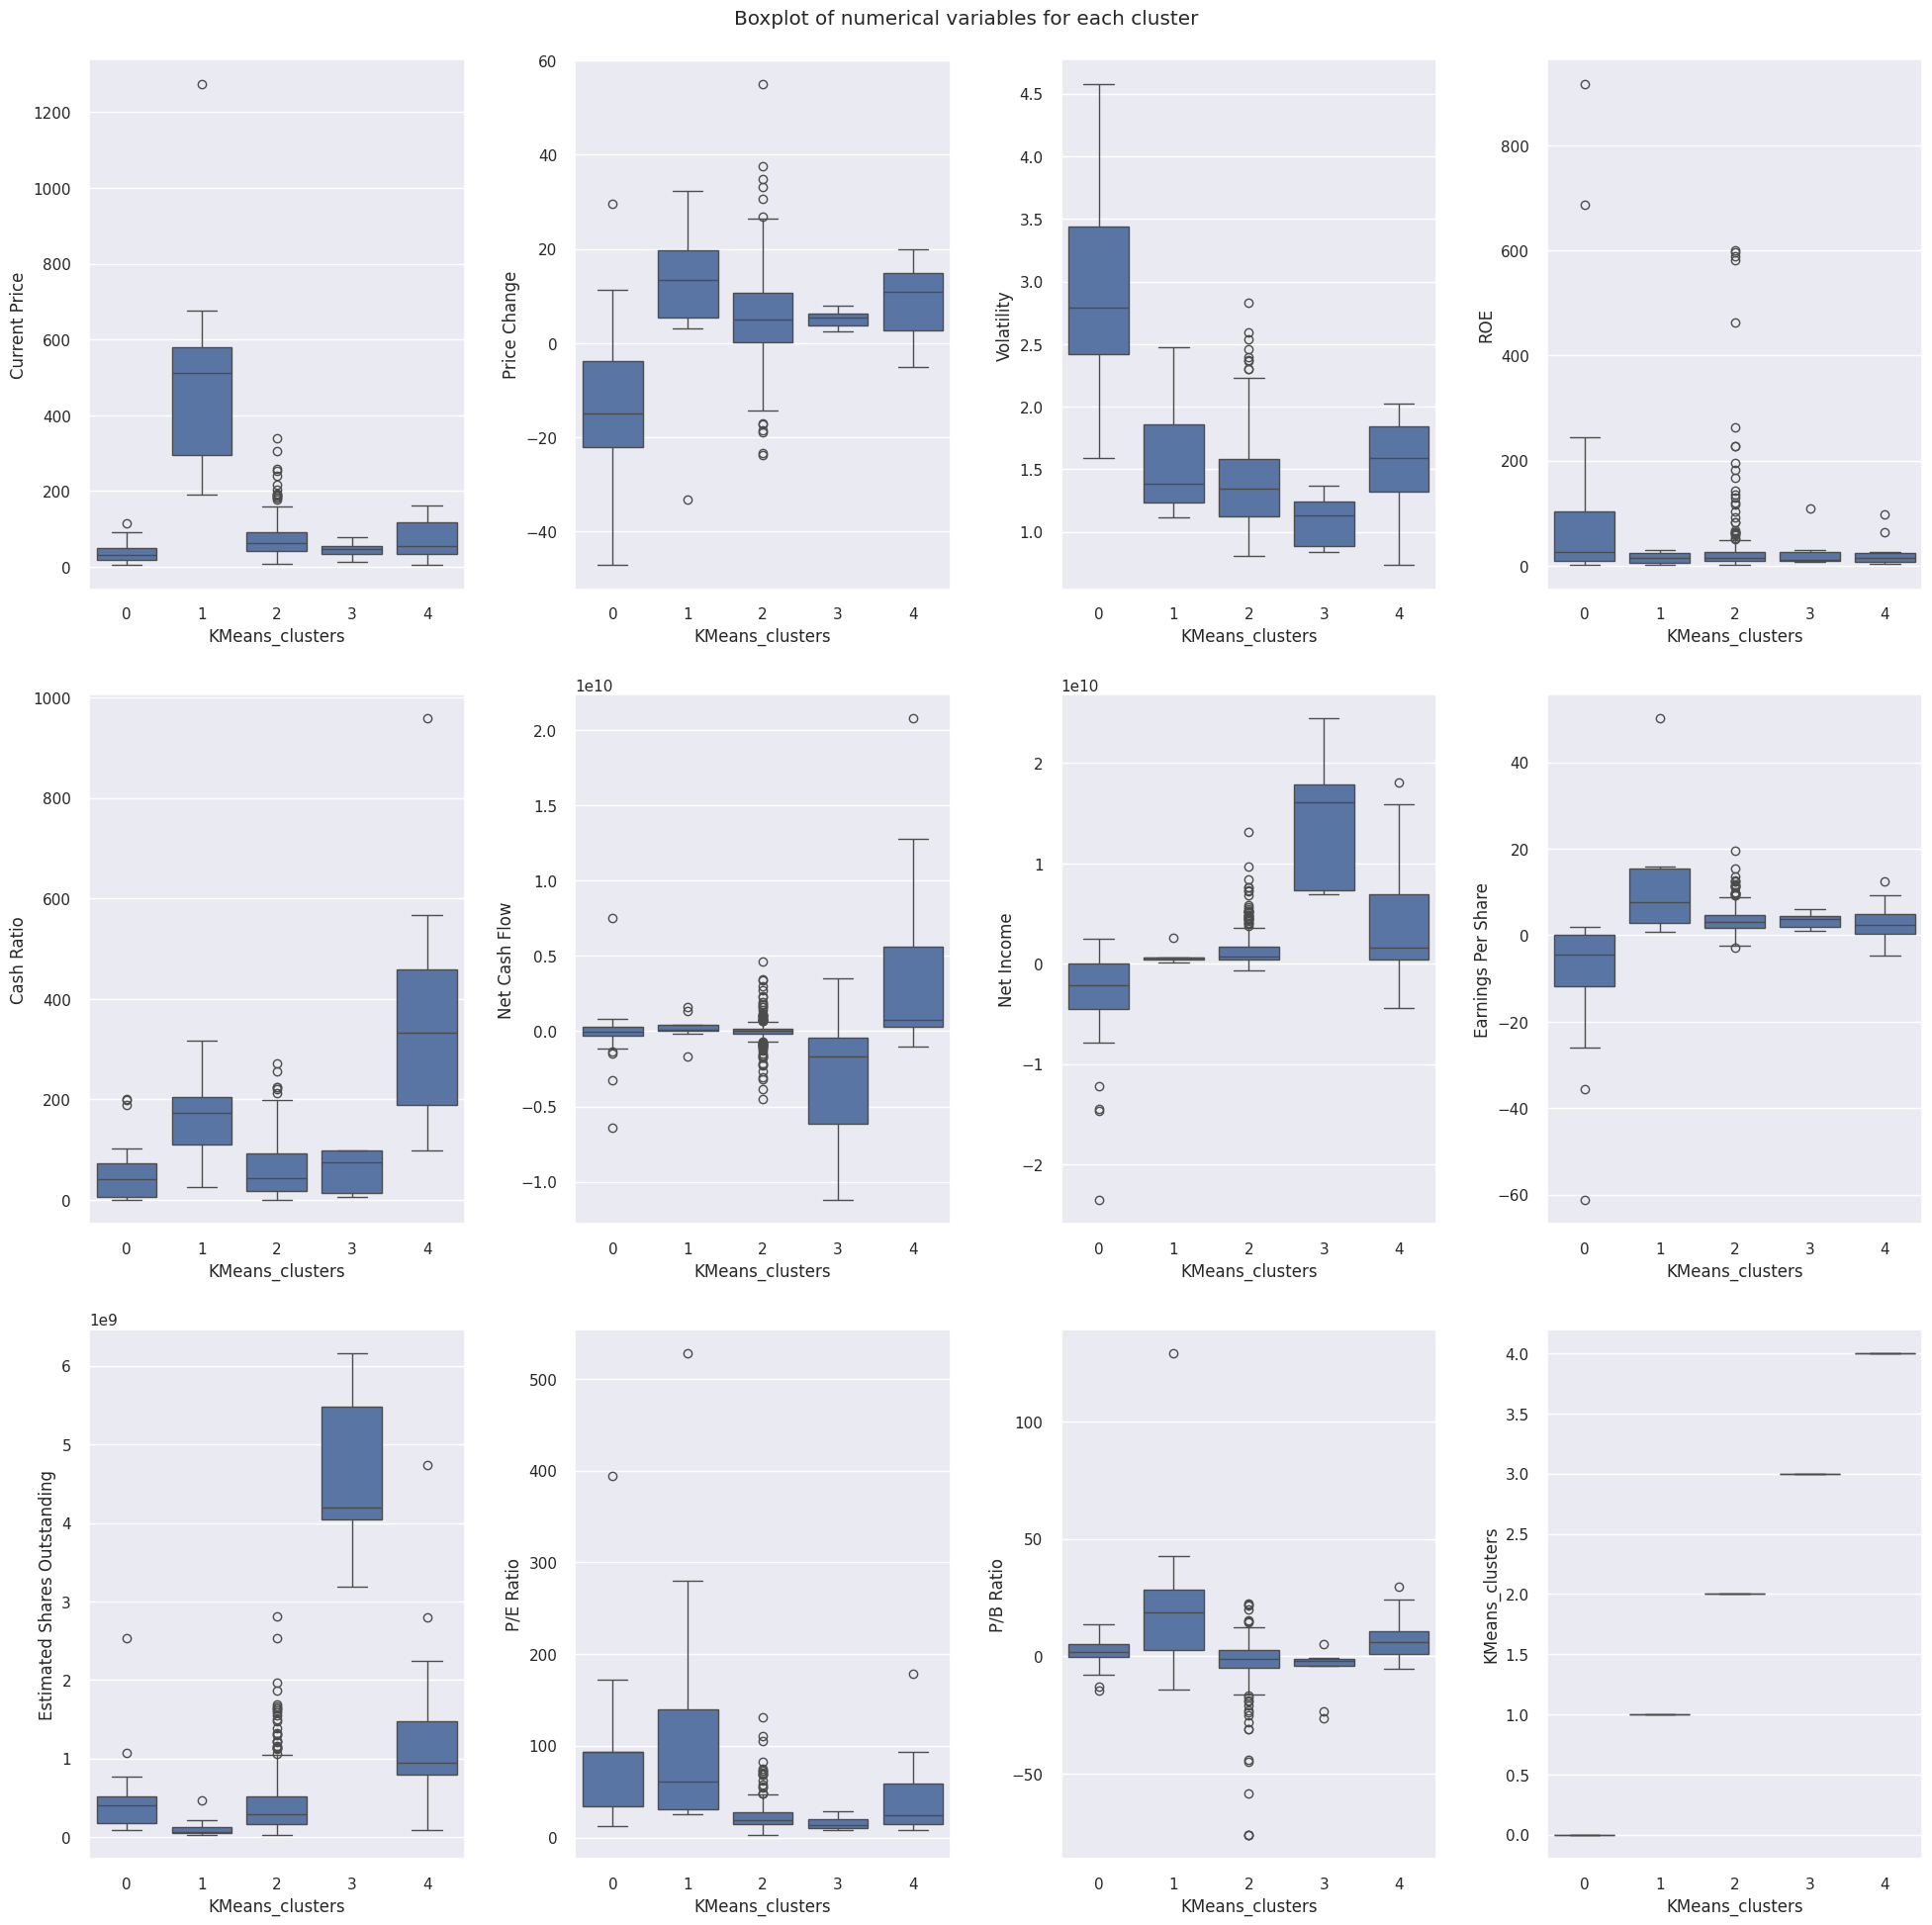

In [456]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data1, x="KMeans_clusters", y=variable)

plt.tight_layout(pad=2.0)

Observations:

* General Median Consistency: Almost all clusters have their medians close to zero, indicating consistency within the clusters.
Cash Ratio:

* Cluster 4 has a slightly higher median cash ratio.
Outliers are present in clusters 0 and 4, suggesting a few companies with unusually high cash ratios.
Current Price:

* Cluster 4 exhibits a higher median price and greater variability.
Significant outliers are present in most clusters, particularly clusters 0 and 4, indicating stocks with higher prices.
Earnings Per Share (EPS):

* Clusters 3 and 4 have wider interquartile ranges, reflecting greater variability in EPS within these clusters.
Estimated Shares Outstanding:

* Cluster 4 shows a wider interquartile range, indicating variability in the number of shares outstanding.
Outliers are present in cluster 0, representing companies with a high number of shares outstanding.
Net Cash Flow:

* Clusters 0 and 1 show wider distributions, with medians around zero.
Clusters 2, 3, and 4 have tighter distributions.
Outliers exist across clusters, reflecting companies with extreme net cash flow values (high or low).
Net Income:

* Cluster 0 exhibits a wider distribution.
* Cluster 4 shows some high-income outliers.
* P/B Ratio (Price-to-Book):

The P/B ratio is centered around zero across all clusters.
* Cluster 4 has the widest interquartile range and several outliers, reflecting greater variability in this metric.
P/E Ratio (Price-to-Earnings):

* Some clusters contain outliers, indicating a few companies with exceptionally high or low P/E ratios.
Price Change:

* All clusters have medians near zero, suggesting consistent stock price changes across clusters.
ROE (Return on Equity):

* ROE is centered around zero for all clusters, showing minimal deviation.
Volatility:

* Cluster 3 demonstrates a higher median volatility and a wider spread, indicating stocks in this cluster are more volatile compared to others.

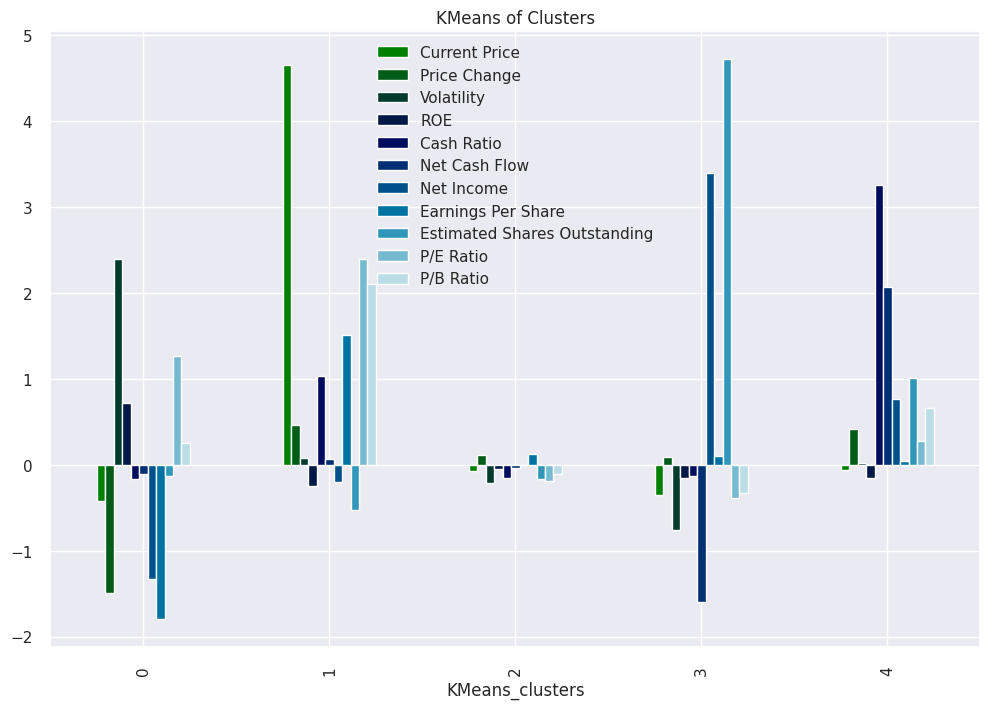

In [457]:
# Generate a color map with a unique color for each bar
num_of_bars = len(k_means_df.columns) - 1  # Subtract 1 for the GROUP column
cm = plt.get_cmap('ocean')
colors = [cm(1. * i / num_of_bars) for i in range(num_of_bars)]

# Plot the bar chart with unique colors
grouped_means = k_means_df.groupby("KMeans_clusters").mean()
grouped_means.plot.bar(figsize=(12, 8), color=colors)
plt.title("KMeans of Clusters")
plt.show()

Observations:

* Bars are negative and positive, it suggests that the mean of that feature in a particular cluster is below zero.
* Data includes negative values e.g. financial data with profits and losses, the means could be negative, reflecting the nature of the data in that cluster.

Observations:

Visualization of the mean values of each feature within scaled dataset, clustered by KMeans clusters.

* Cluster 2: low variability within this group suggests that the data points in this cluster are quite similar to each other across all the features.

* Cluster 0 and 3: show high variability in a group capturing a wider range of characteristics within its members.

* Cluster 1 and 4: show mostly positive values.
* Current Price in Cluster 4 shows significant presence which means it is a significant feature of this group.
* Some features P/E Ratio and P/B Ratio seem to follow similar trends.

## Hierarchical Clustering

#### Computing Cophenetic Correlation

In [458]:
# Create a new DataFrame without the 'KMeans_Cluster' labels
hc_data = subset_scaled_df.copy()

In [459]:
hc_data.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [460]:
# Part 1: Exploring Different Distance Metrics and Linkage Methods
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"] # "centroid" and "ward" require Euclidean distance

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print(f"Cophenetic correlation for {dm} distance and {lm} linkage is {c}.")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm = [dm, lm]

print(f"\n Highest CCC is: {high_cophenet_corr}, obtained with {high_dm_lm[0]} distance and {high_dm_lm[1]} linkage.")

Cophenetic correlation for euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [461]:
# Part 2: Focusing on Euclidean Distance with the linkage methods including "centroid" and "ward"
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

for lm in linkage_methods:
    Z = linkage(hc_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_data))
    print(f"Cophenetic correlation for Euclidean distance and {lm} linkage is {c}.")

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314012446828154.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

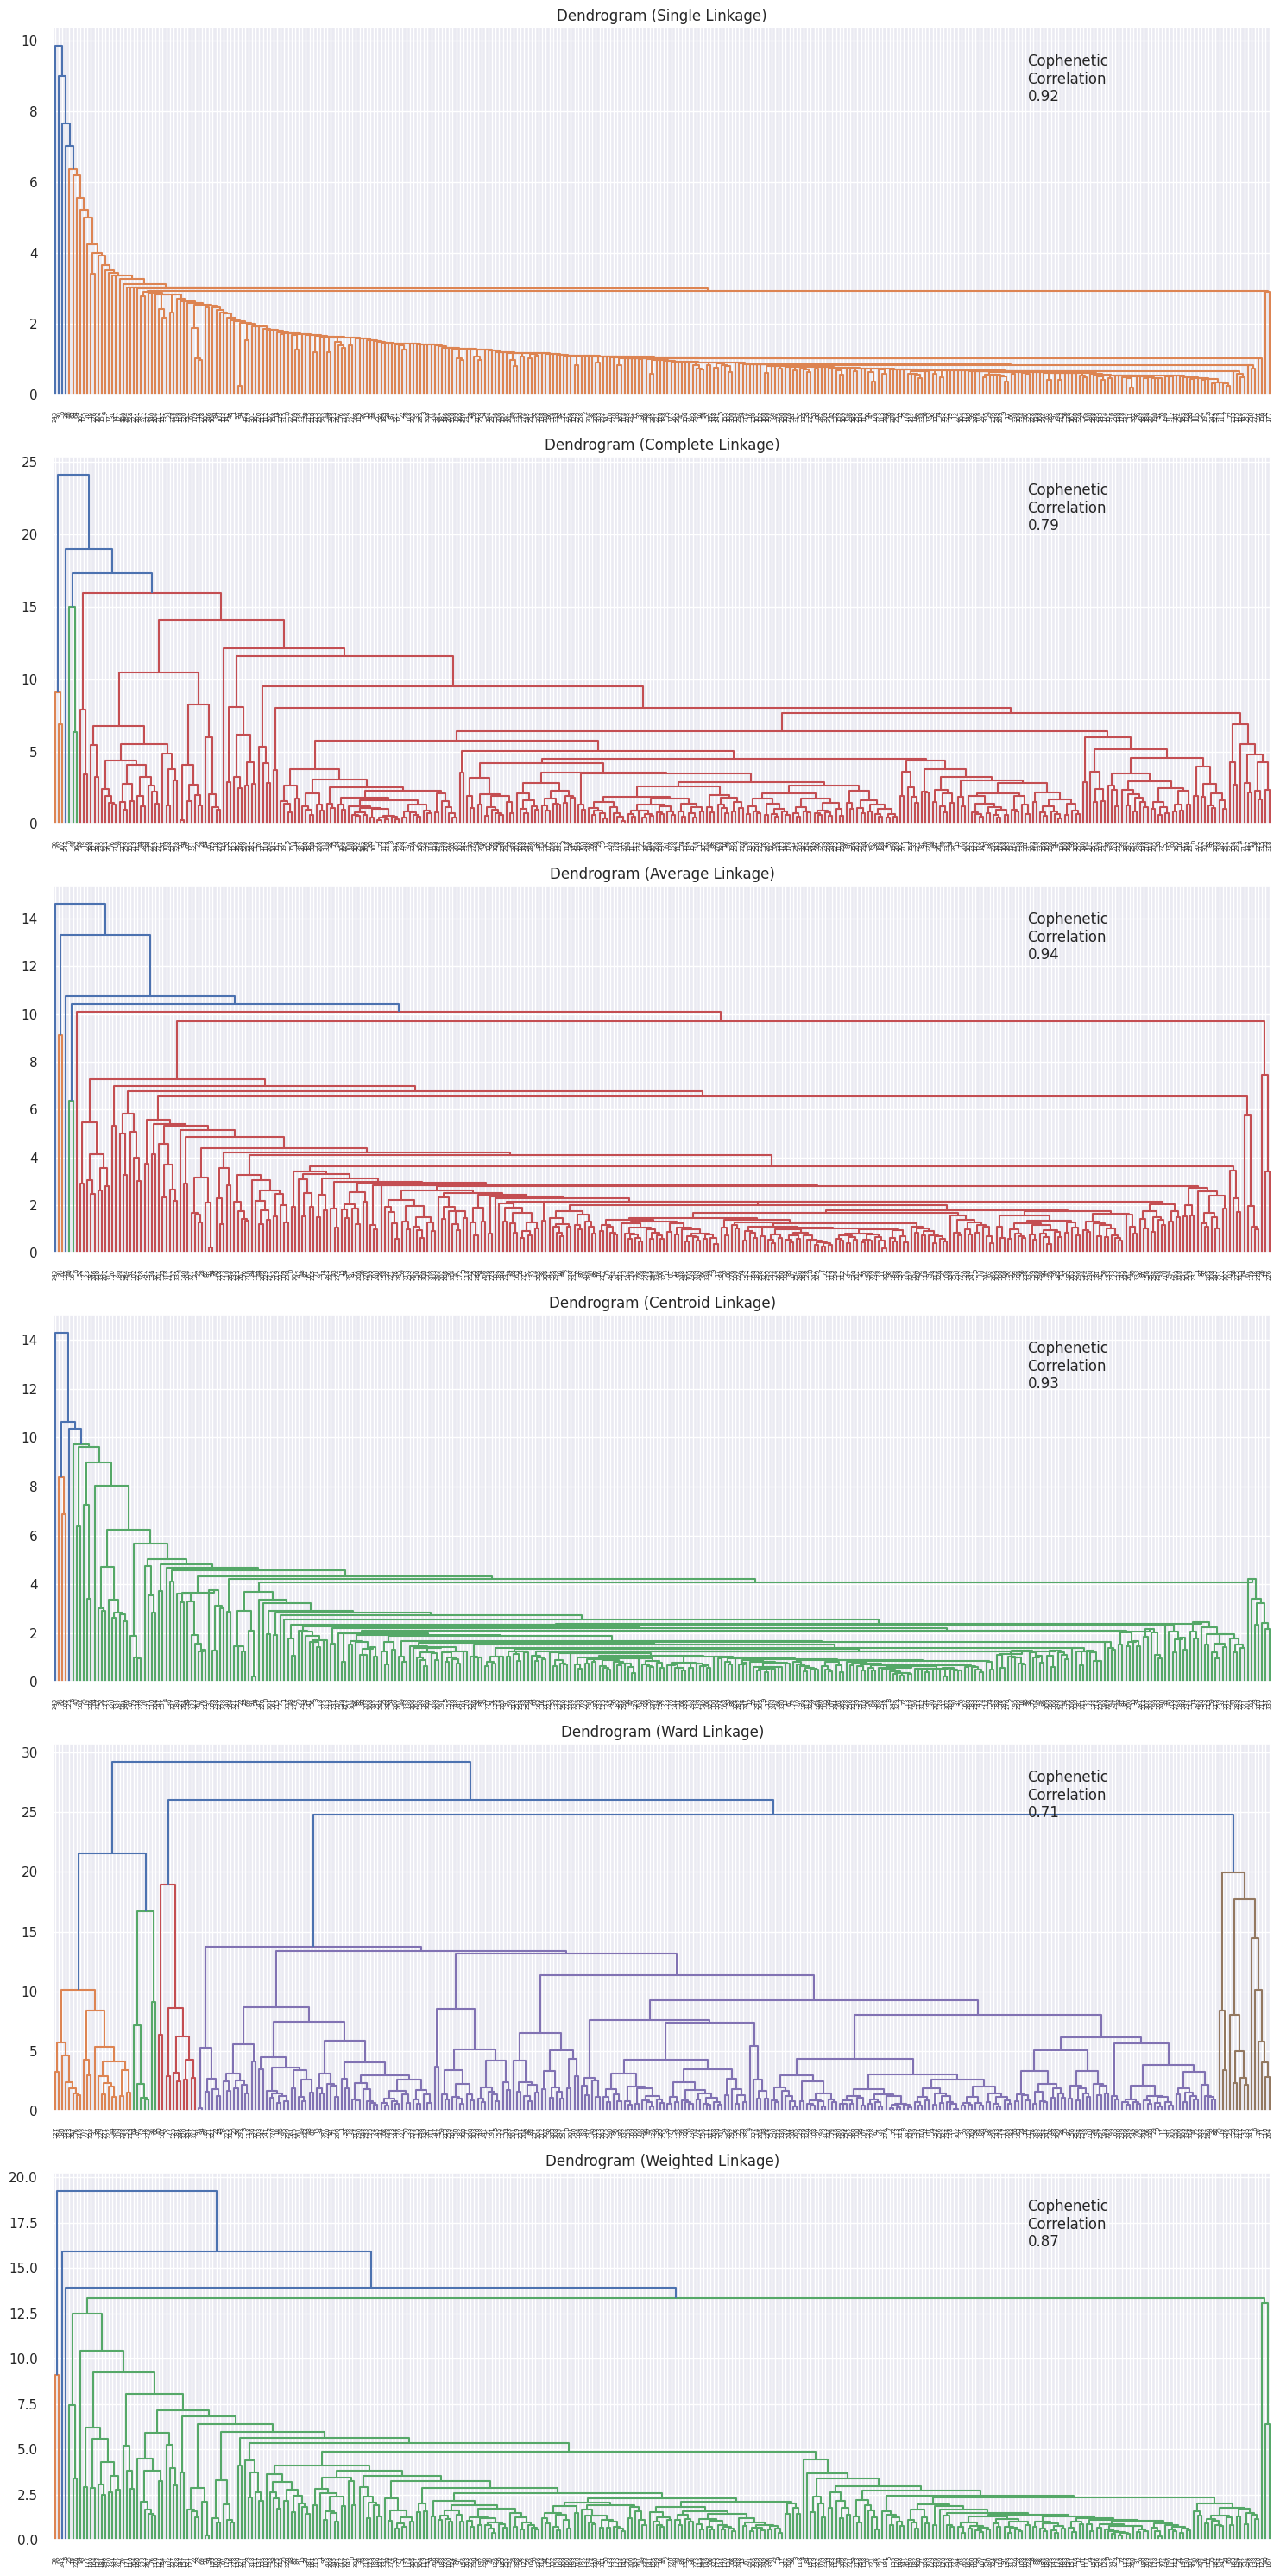

In [462]:
# Part 3: Plotting Dendrograms for Different Linkage Methods
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_data, metric="euclidean", method=method)
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}", (0.80, 0.80), xycoords="axes fraction")

plt.tight_layout()
plt.show()

Observations:

* The cophenetic correlation is highest for Average Linkage followed by Centroid Linkage methods.
* 6 appears to be the appropriate number of clusters from the dendrogram for Average Linkage. however **Ward Linkage** dendrogram offers the best visualization even though it has a lower CC value and can be used to guide the cutoff value.

### Creating model using sklearn

In [463]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="average")

# Fit the model
HCmodel.fit(hc_data)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [464]:
# creating a copy of the original data
data2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = HCmodel.labels_
data2["HC_segments"] = HCmodel.labels_

In [465]:
data2.head(5)

Security             GICS Sector      GICS Sub Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  HC_segments  
0  -8.784219            0  
1  -8.750068            0  
2  -0.394171            0  
3   4.199651            0  
4   1.059810            0

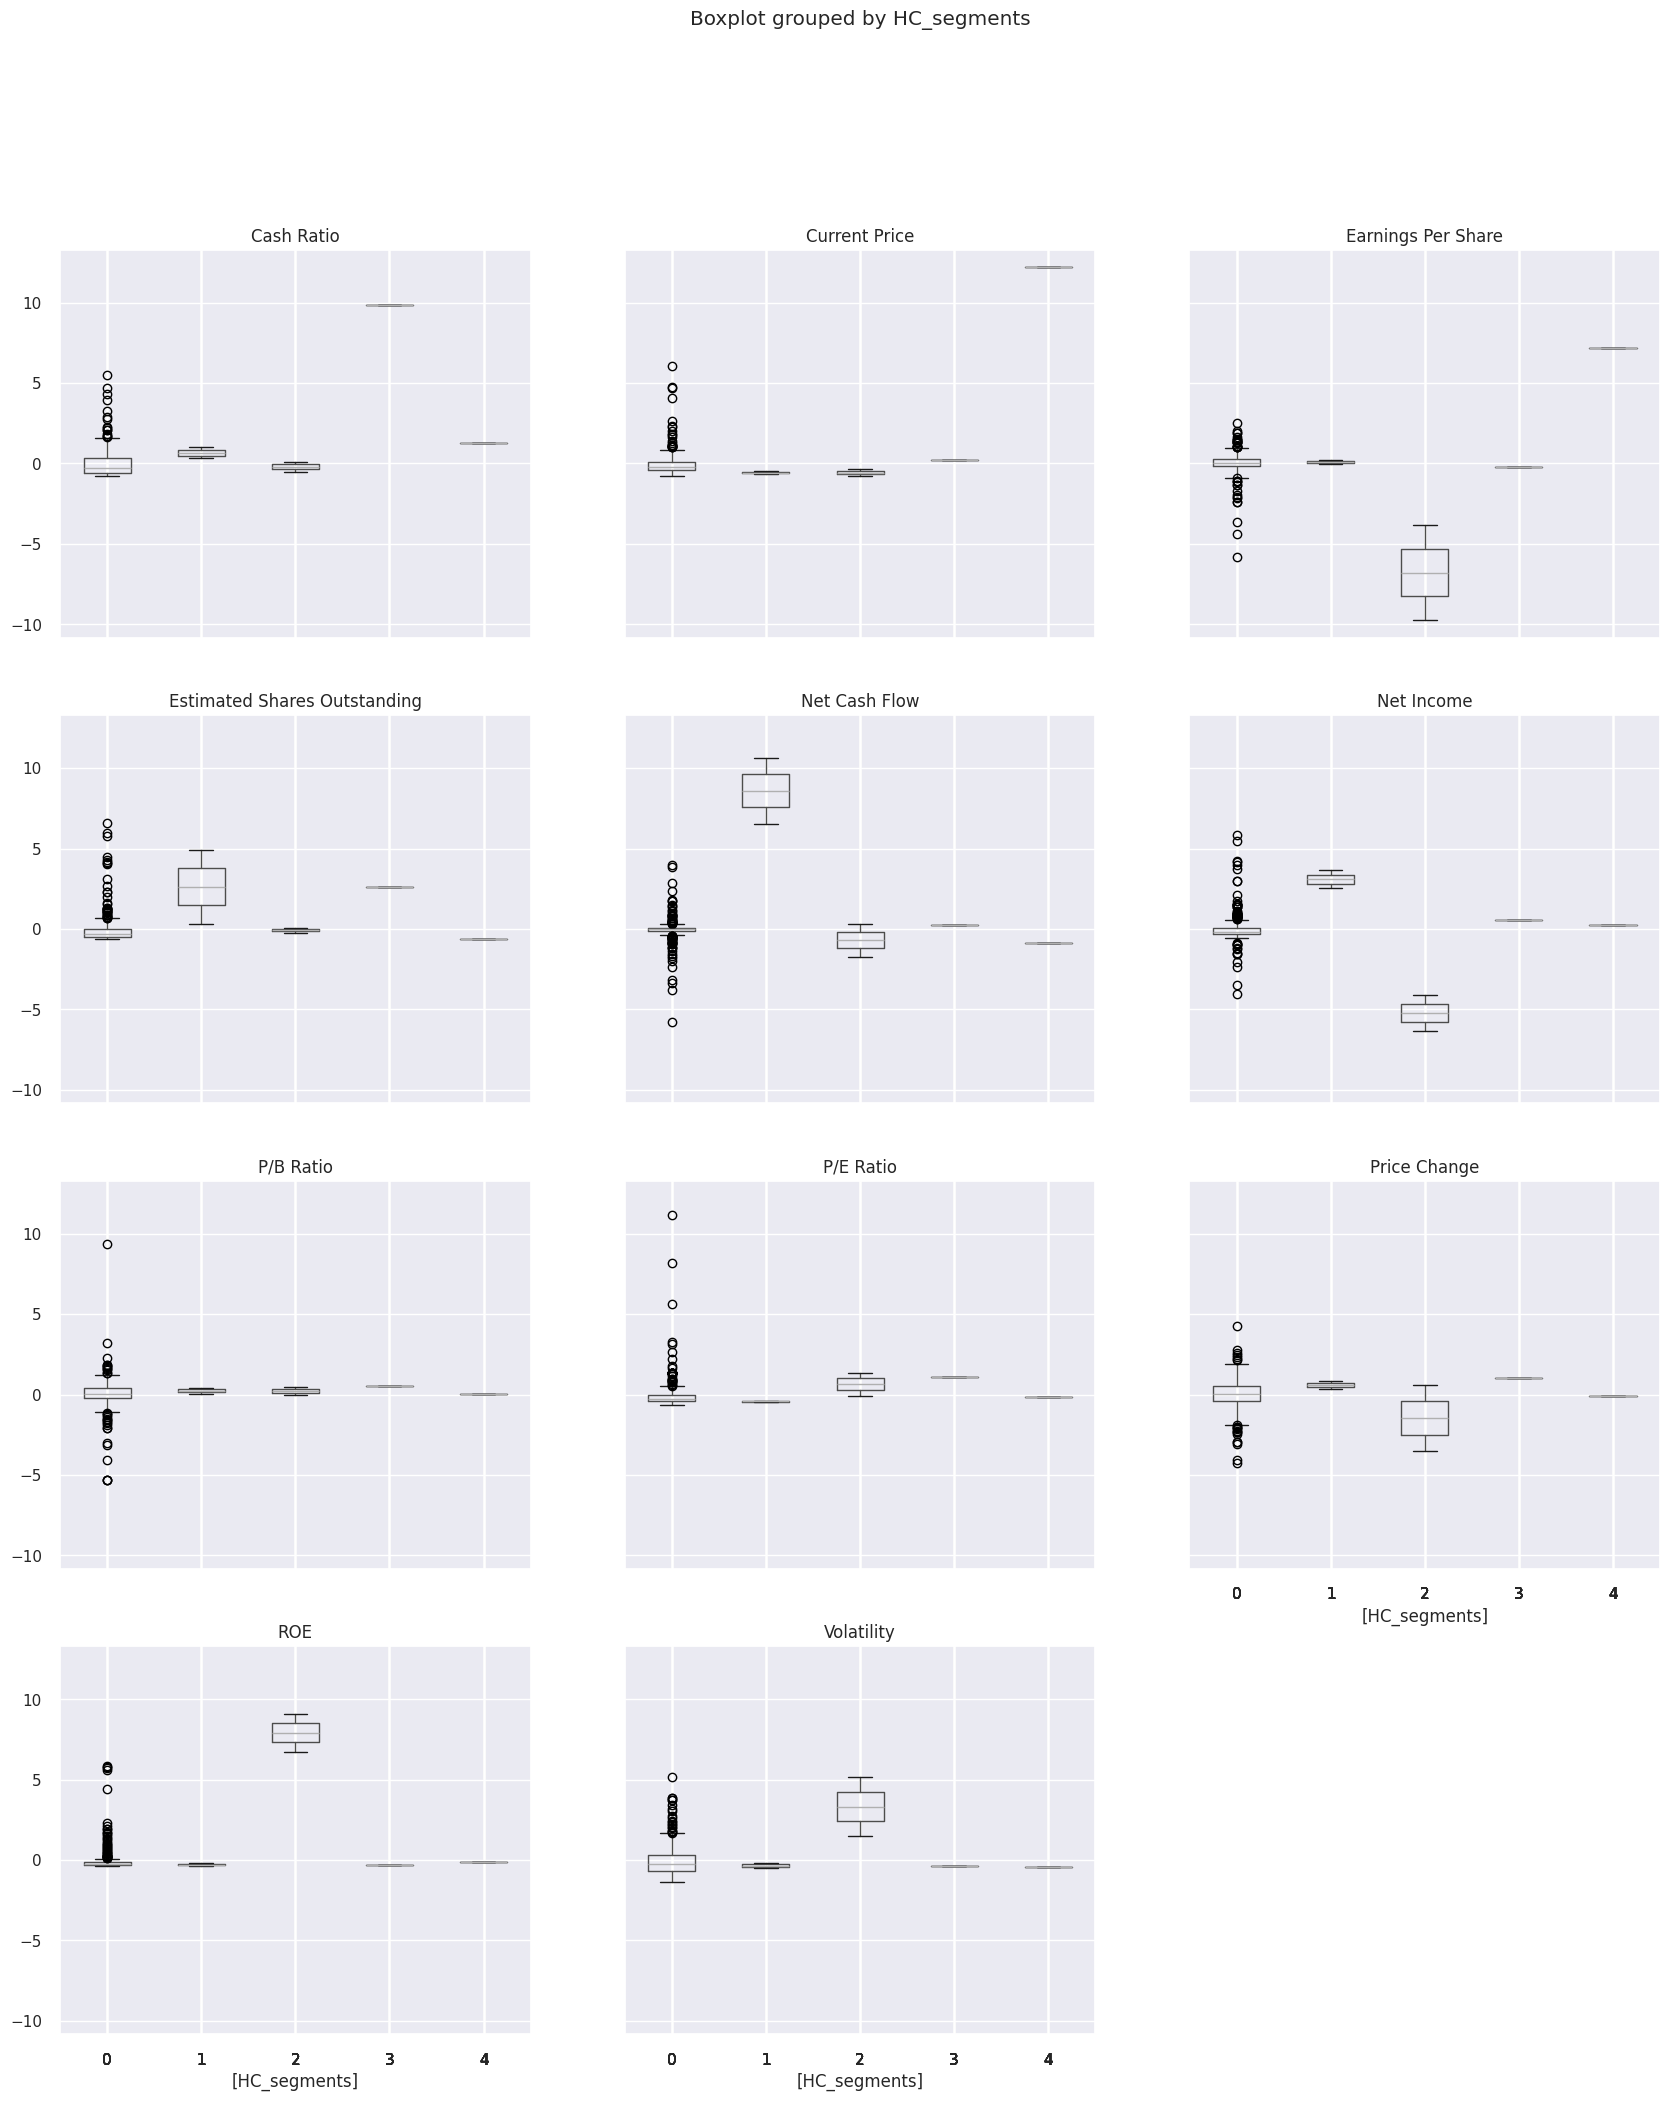

In [466]:
# Create boxplots for each feature within each cluster created with H Clust method
hc_data.boxplot(by='HC_segments', layout = (5,3),figsize=(20,30))
plt.show()

Cluster 0 (Baseline Group):

* Most metrics hover close to the median baseline with fewer extremes.
* Represents a neutral reference group without strong positive or negative deviations in any metric.

Cluster 1 (High ROE & Volatility):
* ROE (Return on Equity): Notably higher than in other clusters, indicating strong returns relative to equity.
* Volatility: Elevated, suggesting that these companies’ stock prices fluctuate more dramatically.
* Other metrics hover near the baseline, implying these firms are profitable (high ROE) but potentially riskier (high volatility).

Cluster 2 (Strong Fundamentals & Scale):
* Net Cash Flow & Net Income: Very high, indicating substantial positive cash generation and profitability.
* Cash Ratio: Higher, suggesting strong liquidity.
Estimated Shares Outstanding: Elevated, implying these may be large, well-capitalized firms.
* This cluster seems to capture well-established, financially robust companies with strong liquidity, earnings, and scale.

Cluster 3 (High Valuation & Price Momentum):
* Price Change: Significantly elevated, indicating recent strong stock performance.
* P/E and P/B Ratios: Higher, suggesting that the market is willing to pay a premium for these firms, possibly due to growth prospects or investor optimism.
* Companies here might be “market darlings” with strong recent returns and valuations that reflect high expectations.

Cluster 4 (High Current Price & EPS):
* Current Price: Notably higher than the other clusters.
* Earnings Per Share (EPS): Also stands out as elevated, signaling strong profitability on a per-share basis.
* This cluster may represent firms perceived as premium stocks due to either established profitability or a position in the market that commands a high share price.

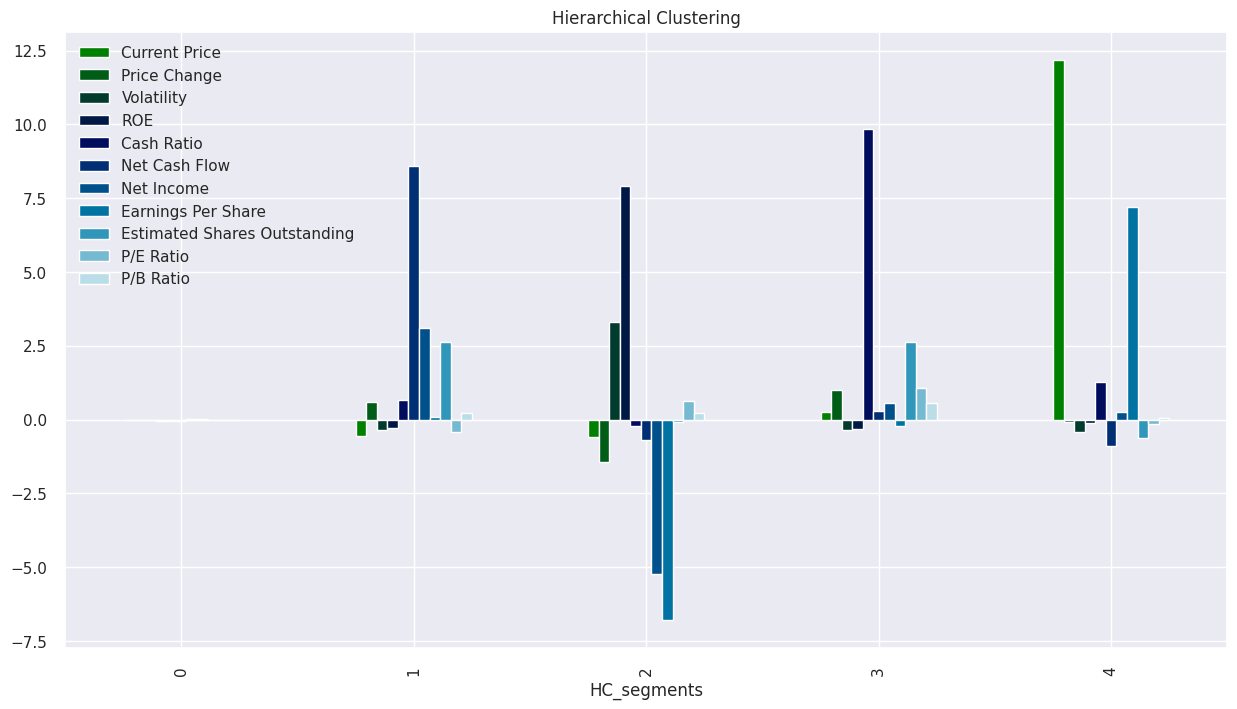

In [467]:
# Generate a color map with a unique color for each bar
num_of_bars = len(hc_data.columns) - 1  # Subtract 1 for the GROUP column
cm = plt.get_cmap('ocean')
colors = [cm(1. * i / num_of_bars) for i in range(num_of_bars)]

# Plot the bar chart with unique colors
grouped_means = hc_data.groupby("HC_segments").mean()
grouped_means.plot.bar(figsize=(15, 8), color=colors)
plt.title("Hierarchical Clustering")
plt.show()

Observations:

* Cluster 0 is characterized by minimal variation across all financial metrics, indicating a grouping of stocks with relatively stable and average financial characteristics.
* Cluster 2 stands out with significant negative values in 'Net Income' and 'Earnings Per Share', indicating a cluster of stocks that may be underperforming in profitability.
* Cluster 3 stands out witg high positive mean in net cash flow.
* Cluster 4 is notable for a high positive mean 'Current Price', possibly representing stocks with higher market valuations or stocks that have seen substantial price appreciation.

### Cluster Profiling

In [468]:
# Count the number of data points in each K-Means cluster
kmeans_counts = data1['KMeans_clusters'].value_counts().sort_index()

# Count the number of data points in each Hierarchical cluster
hcluster_counts = data2['HC_segments'].value_counts().sort_index()

# Display the counts
print("Counts per KMeans Cluster:")
print(kmeans_counts)
print("\nCounts per Hierarchical Cluster:")
print(hcluster_counts)

Counts per KMeans Cluster:
KMeans_clusters
0     28
1      8
2    282
3      9
4     13
Name: count, dtype: int64

Counts per Hierarchical Cluster:
HC_segments
0    334
1      2
2      2
3      1
4      1
Name: count, dtype: int64


In [469]:
num_cols_hc = data2.select_dtypes(include=np.number).columns

In [470]:
hc_cluster_profile = data2[num_cols_hc].groupby("HC_segments").mean()

In [471]:
hc_cluster_profile["count_in_each_segment"] = (data2.groupby("HC_segments")["Security"].count().values)

In [472]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [473]:
# companies in each cluster
for cl in data2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data2[data2["HC_segments"] == cl]["Security"].unique())
    print("-" * 100)

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 334
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
----------------------------------------------------------------------------------------------------
In cluster 2, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']
----------------------------------------------------------------------------------------------------
In cluster 1, the following companies are present:
['Bank of America Corp', 'Intel Corp

Observations:

* The majority of firms fall into Cluster 0, indicating a common “baseline” financial profile within the dataset.
* Clusters 1 and 3 represent companies that are highly profitable and/or have strong market performance, but differ in scale and valuation.
* Cluster 2 contains companies in what seems to be extreme distress or with highly anomalous financial metrics.
* Cluster 4 is an anomaly of another kind—an extremely high-priced, high-EPS stock with unusual balance sheet characteristics.

In [474]:
data2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          0
             Financials                      1
             Health Care                     0
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
2            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          2
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
3            Consumer Discretionary          0
             Consumer Staples                0
             Energy                          0
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
4            Consumer Discretionary          1
             Consumer Staples                0
             Energy                          0
             Financials                      0
             Health Care                     0
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
Name: Security, dtype: int64

In [475]:
#kmeans_stocks_by_sector
kmeans_stocks_by_sector = data1.groupby(['KMeans_clusters', 'GICS Sector']).size().reset_index(name='Stock Count per Sector')

Text(0, 0.5, 'Count of Stocks')

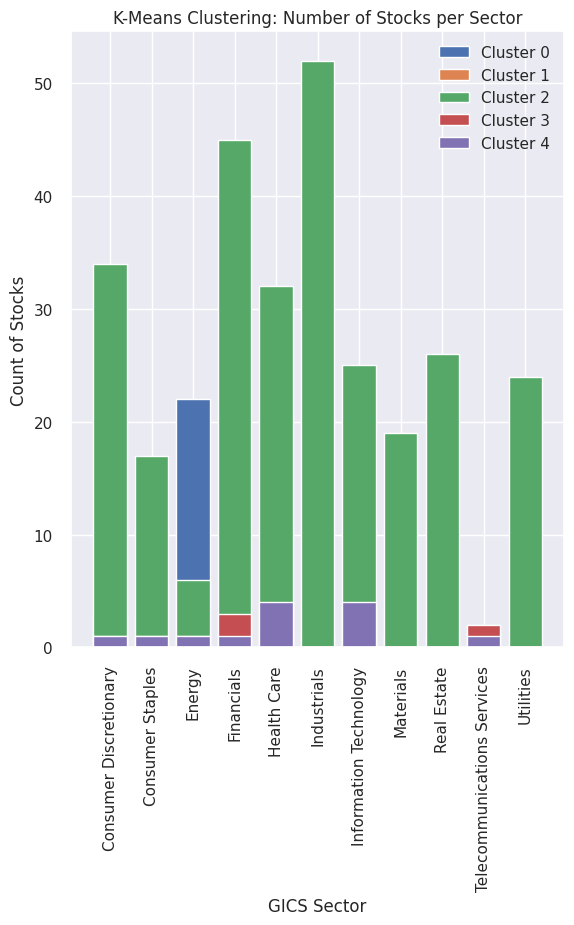

In [476]:
# Plot for KMeans clusters
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
for cluster in sorted(kmeans_stocks_by_sector['KMeans_clusters'].unique()):
    # Filter the DataFrame for the current cluster
    cluster_data = kmeans_stocks_by_sector[kmeans_stocks_by_sector['KMeans_clusters'] == cluster]
    plt.bar(cluster_data['GICS Sector'], cluster_data['Stock Count per Sector'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering: Number of Stocks per Sector')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('GICS Sector')
plt.ylabel('Count of Stocks')

Observations:

* The bar plot shows the distribution of clustered companies across different GICS sectors. One cluster (green bars, likely Cluster 2) overwhelmingly dominates most sectors, indicating that the majority of companies, regardless of sector, share similar financial characteristics corresponding to that cluster's profile.
* Other clusters appear in smaller numbers and are present in fewer sectors. For instance, Energy and Consumer Staples have a noticeable share of companies in another cluster (blue bars, Cluster 0), while some clusters (like those represented by red or purple bars) appear only as small segments in select sectors.
* Overall, the plot suggests that while one particular cluster type is common across nearly all sectors, certain sectors also contain smaller groups of companies with distinct financial attributes.

In [477]:
# Group by HC_segments and GICS Sector, then count the stocks
hcluster_stocks_by_sector = data2.groupby(['HC_segments', 'GICS Sector']).size().reset_index(name='Stock Count per Sector')
print("Number of stocks per sector for each Hierarchical cluster:")
print(hcluster_stocks_by_sector)

Number of stocks per sector for each Hierarchical cluster:
    HC_segments                  GICS Sector  Stock Count per Sector
0             0       Consumer Discretionary                      39
1             0             Consumer Staples                      19
2             0                       Energy                      28
3             0                   Financials                      48
4             0                  Health Care                      40
5             0                  Industrials                      53
6             0       Information Technology                      31
7             0                    Materials                      20
8             0                  Real Estate                      27
9             0  Telecommunications Services                       5
10            0                    Utilities                      24
11            1       Consumer Discretionary                       0
12            1             Consumer Staples

In [478]:
# Plot for Hierarchical clusters
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
for cluster in sorted(hcluster_stocks_by_sector['HC_segments'].unique()):
    # Filter the DataFrame for the current cluster
    cluster_data = hcluster_stocks_by_sector[hcluster_stocks_by_sector['HC_segments'] == cluster]
    plt.bar(cluster_data['GICS Sector'], cluster_data['Stock Count per Sector'], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering: Number of Stocks per Sector')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('GICS Sector')
plt.ylabel('Count of Stocks')

plt.tight_layout()
plt.show()

Observations:

* Dominant Single Cluster:
A single cluster (Cluster 0, represented by the tall blue bars) encompasses the vast majority of companies in almost every sector. This suggests that, under hierarchical clustering, most companies share similar enough attributes to be grouped together.

* Minor Clusters Are Sector-Specific:
A few other clusters (represented by shorter bars in different colors) appear in select sectors, but they make up only a small fraction of the total. For example, there might be a green bar for Energy or an orange bar for Financials, indicating a small subset of companies in those sectors that differ notably from the large main cluster.

* Lack of Broad Differentiation Across Sectors:
The dominance of one cluster across most sectors implies that the hierarchical clustering did not partition the data into multiple, evenly sized groups with distinct characteristics. Instead, it found one large, relatively homogeneous cluster plus a few small, more specialized clusters.

In [479]:
# Compare the silhouette scores for the clusters obtained from each method using the DataFrame without labels, subset_scaled_df
silhouette_kmeans = silhouette_score(subset_scaled_df, k_means_df['KMeans_clusters'])
silhouette_hclust = silhouette_score(subset_scaled_df, hc_data['HC_segments'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hclust}")

Silhouette Score for K-Means: 0.4670141851729817
Silhouette Score for Hierarchical Clustering: 0.6401564320419423


Observations:

* A higher average silhouette score indicates better-defined clusters.

* Cross-tabulation (or contingency table)
* How to interpret it:

Cluster labels are arbitrary. The label "2" in K-Means doesn't necessarily correspond to the label "2" in hierarchical clustering. One algorithm might label a cluster as "2", while another algorithm could give the same group of data points a different label.

In [480]:
# See how many data points from each K-Means cluster fall into each hierarchical cluster
from pandas import crosstab
ct = crosstab(data1['KMeans_clusters'], data2['HC_segments'])
display(ct)

HC_segments        0  1  2  3  4
KMeans_clusters                 
0                 26  0  2  0  0
1                  7  0  0  0  1
2                282  0  0  0  0
3                  9  0  0  0  0
4                 10  2  0  1  0

Observations:

This crosstab helps you understand how the results of K-Means Clustering and Hierarchical Clustering overlap or correspond. Specifically:

You can see whether the clusters generated by K-Means align well with the segments generated by Hierarchical Clustering.
For example:

KMeans_clusters = 2 aligns almost entirely with HC_segments = 0 (282 points).

KMeans_clusters = 0 mostly aligns with HC_segments = 0 (26 points), with some overlap in other segments.

### PCA for Visual Comparison

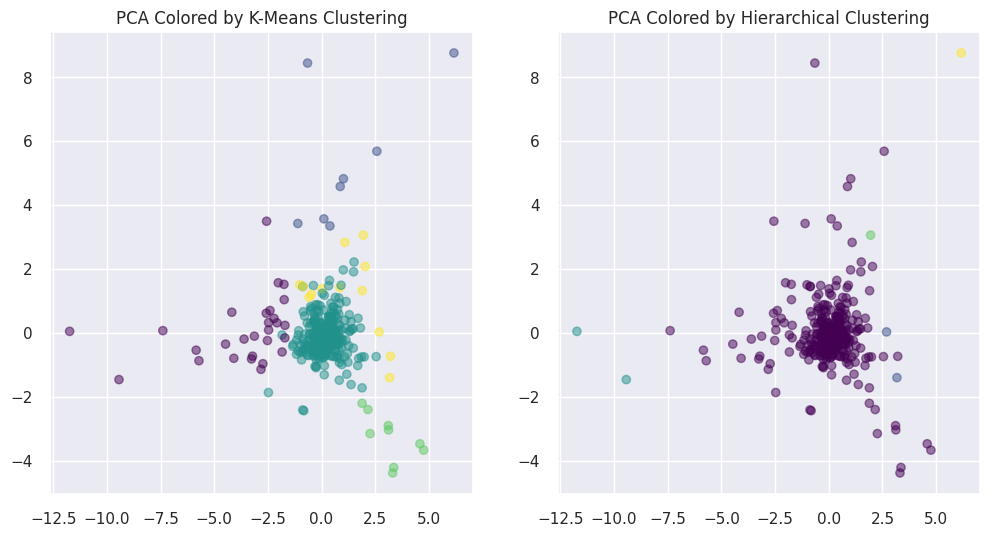

In [481]:
# Reduce the dimentions of the data using PCA to plot the clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(subset_scaled_df)

plt.figure(figsize=(12, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=k_means_df['KMeans_clusters'], cmap='viridis', alpha=0.5)
plt.title('PCA Colored by K-Means Clustering')

# Hierarchical Clusters
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hc_data['HC_segments'], cmap='viridis', alpha=0.5)
plt.title('PCA Colored by Hierarchical Clustering')

plt.show()

#### t-SNE (t-distributed Stochastic Neighbor Embedding)
For two-dimensional representation of the high-dimensional data

In [482]:
from sklearn.manifold import TSNE  # Import TSNE
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)  # n_components can be 2 or 3

# Apply t-SNE to the scaled data without labels
tsne_results = tsne.fit_transform(subset_scaled_df)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Add back the cluster labels
tsne_df['KMeans_clusters'] = k_means_df['KMeans_clusters']
tsne_df['HC_segments'] = hc_data['HC_segments']

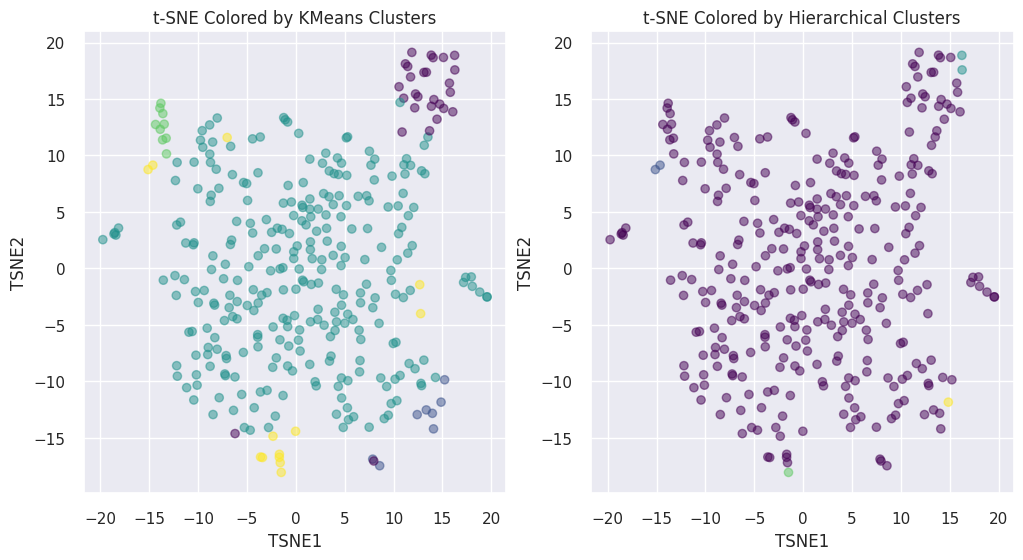

In [483]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# t-SNE colored by KMeans clusters
axes[0].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['KMeans_clusters'], cmap='viridis', alpha=0.5)
axes[0].set_title('t-SNE Colored by KMeans Clusters')
axes[0].set_xlabel('TSNE1')
axes[0].set_ylabel('TSNE2')

# t-SNE colored by Hierarchical clusters
axes[1].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['HC_segments'], cmap='viridis', alpha=0.5)
axes[1].set_title('t-SNE Colored by Hierarchical Clusters')
axes[1].set_xlabel('TSNE1')
axes[1].set_ylabel('TSNE2')

# Show the plots
plt.show()

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

Answers:
Execution Time: K-means and hierarchical clustering both executed swiftly, which means that for this dataset, computational efficiency is high with either method.

Distinct Clusters: Both algorithms identified a major cluster with a significant portion of stocks, indicating a commonality in their characteristics. The smaller clusters suggest potential niche segments within the market.

Overlap in Clusters: Cross-tabulation revealed significant overlap of 282 data points between the two methods, indicating some agreement in cluster assignments.

Recommended Clusters: K-Means recommended 5 clusters, while Hierarchical recommended 6, pointing to a slight difference in clustering structure.


## Actionable Insights and Recommendations

* Diversify Based on Clusters: Construct portfolios by combining stocks from multiple identified clusters, ensuring exposure to both stable, large-cap firms and high-growth, high-volatility players.

* Sector-Specific Strategies: Different clusters dominating certain sectors (like Energy or IT) can guide sector-rotation strategies, helping clients capitalize on cyclical or structural sector trends.

* Monitor Outliers: Pay attention to clusters with extreme outliers (very high ROE, exceptionally large share counts) to identify niche companies with unique capital structures or growth stories.

* Algorithm Refinement: The difference in cluster suggestions from K-Means and Hierarchical clustering methods indicates a need for algorithm refinement. Combining insights from both methods could lead to a more robust clustering solution.

* Tailor Portfolios to Client Profiles: For risk-averse clients, favor clusters with stable earnings and lower volatility; for risk-tolerant clients, consider the high-growth or high-ROE clusters.

* Continuous Review: As market conditions and company fundamentals evolve, periodically re-run cluster analyses to ensure investment strategies remain aligned with the most current stock groupings and trends.